<a href="https://colab.research.google.com/github/Aishaamalik/Mental-Health-Economic-Indicators-Project-/blob/main/PROJECT_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mental Health & Economic Indicators Project**

----
----

# 1: DATA EXPLORATION

## 1: Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## 2: Loading the Data

In [ ]:
df = pd.read_csv('survey.csv')


## 3: Dataset Overview

In [ ]:
print(" DATASET OVERVIEW")
print("-" * 30)
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

 DATASET OVERVIEW
------------------------------
Dataset shape: (1259, 27)
Number of rows: 1259
Number of columns: 27


## 4: Column Names

In [ ]:
print(" COLUMN NAMES")
print("-" * 30)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

 COLUMN NAMES
------------------------------
 1. Timestamp
 2. Age
 3. Gender
 4. Country
 5. state
 6. self_employed
 7. family_history
 8. treatment
 9. work_interfere
10. no_employees
11. remote_work
12. tech_company
13. benefits
14. care_options
15. wellness_program
16. seek_help
17. anonymity
18. leave
19. mental_health_consequence
20. phys_health_consequence
21. coworkers
22. supervisor
23. mental_health_interview
24. phys_health_interview
25. mental_vs_physical
26. obs_consequence
27. comments


## 5: Data Types

In [ ]:
print("DATA TYPES")
print("-" * 30)
print(df.dtypes)

DATA TYPES
------------------------------
Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments              

## 6: First and last five row display

In [ ]:

print("\n FIRST 5 ROWS")
print("-" * 30)
print(df.head())

print("\n LAST 5 ROWS")
print("-" * 30)
print(df.tail())


 FIRST 5 ROWS
------------------------------
             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy          

## 7: Numerical Columns Statistics

In [ ]:
print("\n NUMERICAL COLUMNS STATISTICS")
print("-" * 30)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if numerical_cols:
    print(df[numerical_cols].describe())
else:
    print("No numerical columns found")


 NUMERICAL COLUMNS STATISTICS
------------------------------
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11


## 8: Missing Values Analysis

In [ ]:
print("\n MISSING VALUES ANALYSIS")
print("-" * 30)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df.to_string(index=False))


 MISSING VALUES ANALYSIS
------------------------------
        Column  Missing_Count  Missing_Percentage
      comments           1095           86.973789
         state            515           40.905481
work_interfere            264           20.969023
 self_employed             18            1.429706


## 9: Unique Values Count


In [ ]:
print("\n UNIQUE VALUES COUNT")
print("-" * 30)
unique_counts = df.nunique().sort_values(ascending=False)
for col, count in unique_counts.items():
    print(f"{col}: {count} unique values")

## 10:  Key Categorical Variables Distribution

In [ ]:
print("\n KEY CATEGORICAL VARIABLES DISTRIBUTION")
print("-" * 30)

key_columns = ['Age', 'Gender', 'Country', 'treatment', 'work_interfere',
               'family_history', 'self_employed', 'tech_company', 'remote_work']

for col in key_columns:
    if col in df.columns:
        print(f"\n{col.upper()} Distribution:")
        value_counts = df[col].value_counts()
        print(value_counts.head(10))
        print(f"Total unique values: {df[col].nunique()}")


 KEY CATEGORICAL VARIABLES DISTRIBUTION
------------------------------

AGE Distribution:
Age
29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
Name: count, dtype: int64
Total unique values: 53

GENDER Distribution:
Gender
Male      615
male      206
Female    121
M         116
female     62
F          38
m          34
f          15
Make        4
Male        3
Name: count, dtype: int64
Total unique values: 49

COUNTRY Distribution:
Country
United States     751
United Kingdom    185
Canada             72
Germany            45
Netherlands        27
Ireland            27
Australia          21
France             13
India              10
New Zealand         8
Name: count, dtype: int64
Total unique values: 48

TREATMENT Distribution:
treatment
Yes    637
No     622
Name: count, dtype: int64
Total unique values: 2

WORK_INTERFERE Distribution:
work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64


## 11: Age Analysis

In [ ]:
if 'Age' in df.columns:
    try:
        age_numeric = pd.to_numeric(df['Age'], errors='coerce')
        print(f"\nAGE STATISTICS:")
        print(f"Mean age: {age_numeric.mean():.2f}")
        print(f"Median age: {age_numeric.median():.2f}")
        print(f"Min age: {age_numeric.min()}")
        print(f"Max age: {age_numeric.max()}")
        print(f"Standard deviation: {age_numeric.std():.2f}")
    except:
        print("\nAge column contains non-numeric values")


AGE STATISTICS:
Mean age: 79428148.31
Median age: 31.00
Min age: -1726
Max age: 99999999999
Standard deviation: 2818299442.98


## 12: Treatment Analysis

In [ ]:
if 'treatment' in df.columns:
    print(f"\n TREATMENT ANALYSIS")
    print("-" * 30)
    treatment_counts = df['treatment'].value_counts()
    print("Treatment distribution:")
    print(treatment_counts)
    print(f"\nTreatment percentage:")
    print((treatment_counts / len(df) * 100).round(2))


 TREATMENT ANALYSIS
------------------------------
Treatment distribution:
treatment
Yes    637
No     622
Name: count, dtype: int64

Treatment percentage:
treatment
Yes    50.6
No     49.4
Name: count, dtype: float64


## 13: Gender Analysis

In [ ]:
if 'Gender' in df.columns:
    print(f"\n GENDER ANALYSIS")
    print("-" * 30)
    gender_counts = df['Gender'].value_counts()
    print("Gender distribution:")
    print(gender_counts.head(10))


 GENDER ANALYSIS
------------------------------
Gender distribution:
Gender
Male      615
male      206
Female    121
M         116
female     62
F          38
m          34
f          15
Make        4
Male        3
Name: count, dtype: int64


## 14: Country Analysis

In [ ]:
if 'Country' in df.columns:
    print(f"\n COUNTRY ANALYSIS")
    print("-" * 30)
    country_counts = df['Country'].value_counts()
    print("Top 10 countries:")
    print(country_counts.head(10))


 COUNTRY ANALYSIS
------------------------------
Top 10 countries:
Country
United States     751
United Kingdom    185
Canada             72
Germany            45
Netherlands        27
Ireland            27
Australia          21
France             13
India              10
New Zealand         8
Name: count, dtype: int64


## 15: Work Interference

In [ ]:
if 'work_interfere' in df.columns:
    print(f"\n WORK INTERFERENCE ANALYSIS")
    print("-" * 30)
    work_counts = df['work_interfere'].value_counts()
    print("Work interference distribution:")
    print(work_counts)


 WORK INTERFERENCE ANALYSIS
------------------------------
Work interference distribution:
work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64


## 16: Company Size

In [ ]:
if 'no_employees' in df.columns:
    print(f"\n COMPANY SIZE ANALYSIS")
    print("-" * 30)
    company_size_counts = df['no_employees'].value_counts()
    print("Company size distribution:")
    print(company_size_counts)


 COMPANY SIZE ANALYSIS
------------------------------
Company size distribution:
no_employees
6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: count, dtype: int64


## 17: Generating Visualizations

### A: Treatment distribution


TREATMENT DISTRIBUTION VISUALIZATION
----------------------------------------

Treatment Data Summary:
treatment
Yes    637
No     622
Name: count, dtype: int64


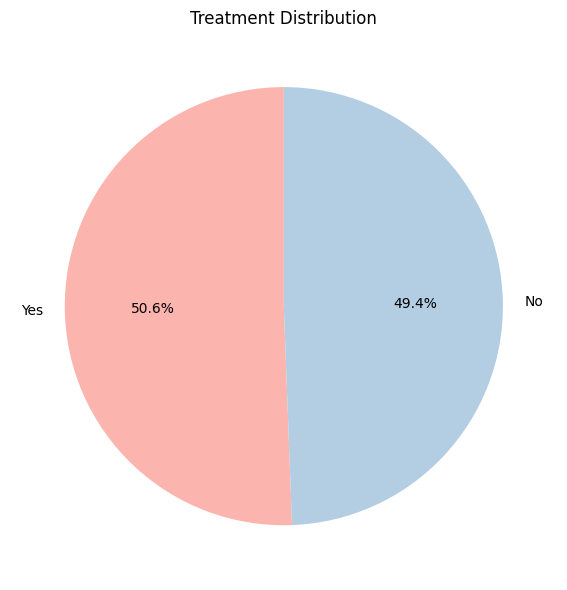

In [ ]:

print("\nTREATMENT DISTRIBUTION VISUALIZATION")
print("-" * 40)

plt.style.use('default')
fig, ax = plt.subplots(figsize=(6, 6))

if 'treatment' in df.columns:
    treatment_counts = df['treatment'].value_counts()

    print("\nTreatment Data Summary:")
    print(treatment_counts)

    ax.pie(
        treatment_counts.values,
        labels=treatment_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Pastel1.colors
    )
    ax.set_title('Treatment Distribution')
else:
    print("\nError: 'treatment' column not found in the dataset.")
    ax.text(0.5, 0.5, 'Treatment column not found', ha='center', va='center')
    ax.set_title('Error: Treatment Data Missing')

plt.tight_layout()
plt.show()


### B: Age Distribution


AGE DISTRIBUTION VISUALIZATION
----------------------------------------

Age Data Summary:
count    1254.000000
mean       32.019139
std         7.375005
min         5.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64


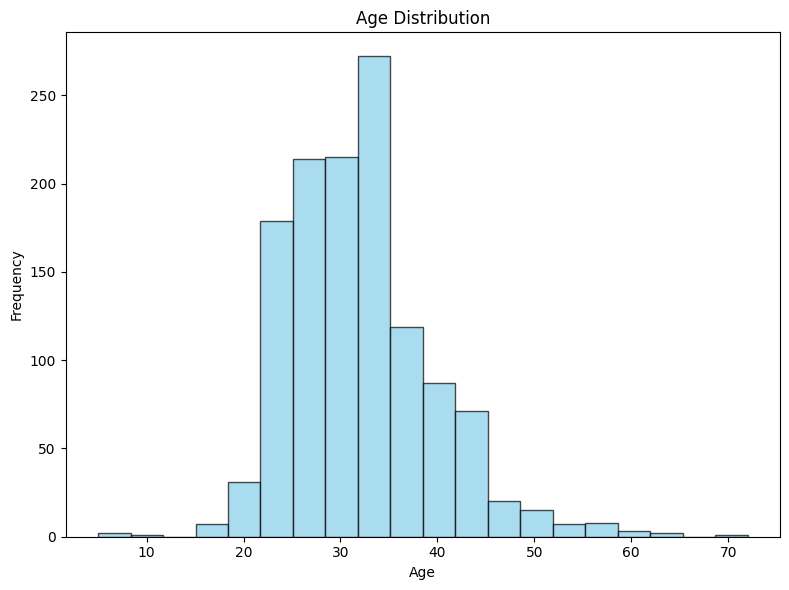

In [ ]:

print("\nAGE DISTRIBUTION VISUALIZATION")
print("-" * 40)

plt.style.use('default')
fig, ax = plt.subplots(figsize=(8, 6))

if 'Age' in df.columns:
    try:
        age_numeric = pd.to_numeric(df['Age'], errors='coerce')
        age_cleaned = age_numeric[(age_numeric >= 0) & (age_numeric <= 100)].dropna()

        print("\nAge Data Summary:")
        print(age_cleaned.describe())

        ax.hist(
            age_cleaned,
            bins=20,
            edgecolor='black',
            alpha=0.7,
            color='skyblue'
        )
        ax.set_title('Age Distribution')
        ax.set_xlabel('Age')
        ax.set_ylabel('Frequency')
    except Exception as e:
        print("\nError processing age data:", str(e))
        ax.text(0.5, 0.5, 'Error processing age data', ha='center', va='center')
        ax.set_title('Age Distribution - Error')
else:
    print("\nError: 'Age' column not found in the dataset.")
    ax.text(0.5, 0.5, 'Age column not found', ha='center', va='center')
    ax.set_title('Error: Age Data Missing')

plt.tight_layout()
plt.show()


### C: Gender Distribution


GENDER DISTRIBUTION VISUALIZATION
---------------------------------------------

Top 10 Gender Categories:
Gender
Male      615
male      206
Female    121
M         116
female     62
F          38
m          34
f          15
Make        4
Male        3
Name: count, dtype: int64


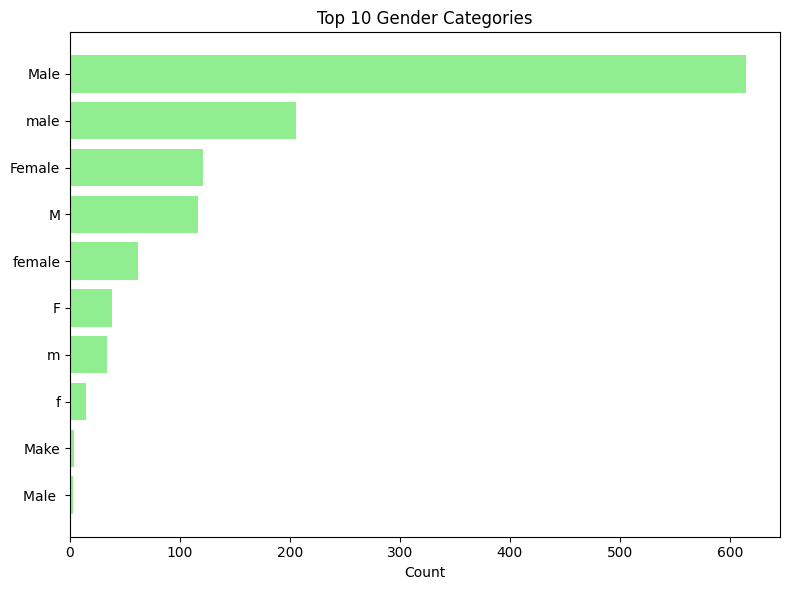

In [ ]:

print("\nGENDER DISTRIBUTION VISUALIZATION")
print("-" * 45)

plt.style.use('default')
fig, ax = plt.subplots(figsize=(8, 6))

if 'Gender' in df.columns:
    gender_top10 = df['Gender'].value_counts().head(10)

    print("\nTop 10 Gender Categories:")
    print(gender_top10)

    ax.barh(
        range(len(gender_top10)),
        gender_top10.values,
        color='lightgreen'
    )
    ax.set_yticks(range(len(gender_top10)))
    ax.set_yticklabels(gender_top10.index)
    ax.set_title('Top 10 Gender Categories')
    ax.set_xlabel('Count')
    ax.invert_yaxis()
else:
    print("\nError: 'Gender' column not found in the dataset.")
    ax.text(0.5, 0.5, 'Gender column not found', ha='center', va='center')
    ax.set_title('Error: Gender Data Missing')

plt.tight_layout()
plt.show()


### D:  Work Interference Distribution


WORK INTERFERENCE DISTRIBUTION VISUALIZATION
--------------------------------------------------

Work Interference Data Summary:
work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64


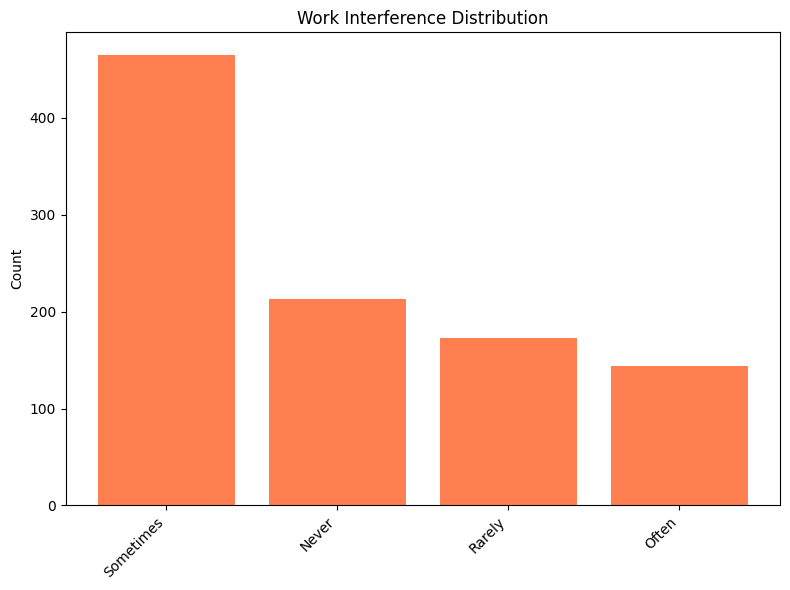

In [ ]:

print("\nWORK INTERFERENCE DISTRIBUTION VISUALIZATION")
print("-" * 50)

plt.style.use('default')
fig, ax = plt.subplots(figsize=(8, 6))

if 'work_interfere' in df.columns:
    work_counts = df['work_interfere'].value_counts()

    print("\nWork Interference Data Summary:")
    print(work_counts)

    ax.bar(
        range(len(work_counts)),
        work_counts.values,
        color='coral'
    )
    ax.set_xticks(range(len(work_counts)))
    ax.set_xticklabels(work_counts.index, rotation=45, ha='right')
    ax.set_title('Work Interference Distribution')
    ax.set_ylabel('Count')
else:
    print("\nError: 'work_interfere' column not found in the dataset.")
    ax.text(0.5, 0.5, 'work_interfere column not found', ha='center', va='center')
    ax.set_title('Error: Work Interference Data Missing')

plt.tight_layout()
plt.show()


## 18: Summary Statistics

In [ ]:
print("\n EXPLORATION SUMMARY")
print("-" * 30)
print(f"Total records: {len(df)}")
print(f"Total features: {len(df.columns)}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Complete cases: {len(df.dropna())}")
print(f"Completion rate: {(len(df.dropna()) / len(df) * 100):.2f}%")



 EXPLORATION SUMMARY
------------------------------
Total records: 1259
Total features: 27
Missing values: 1892
Complete cases: 86
Completion rate: 6.83%


## 19: Data Quality Checks

In [ ]:
print("\n POTENTIAL DATA QUALITY ISSUES")
print("-" * 30)

if 'Age' in df.columns:
    try:
        age_numeric = pd.to_numeric(df['Age'], errors='coerce')
        negative_ages = age_numeric < 0
        if negative_ages.any():
            print(f"Found {negative_ages.sum()} negative age values")
        extreme_ages = (age_numeric > 100) | (age_numeric < 10)
        if extreme_ages.any():
            print(f"Found {extreme_ages.sum()} extreme age values (>100 or <10)")
    except:
        print("Could not analyze age for quality issues")

if 'Gender' in df.columns:
    gender_unique = df['Gender'].str.lower().str.strip().value_counts()
    print(f"Gender has {len(gender_unique)} unique entries (case-insensitive)")


 POTENTIAL DATA QUALITY ISSUES
------------------------------
Found 3 negative age values
Found 7 extreme age values (>100 or <10)
Gender has 41 unique entries (case-insensitive)


----
----

# 2: Data Cleaning & Pre-processing

## 1: Required Libraries

In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import re
df = pd.read_csv('survey.csv')

print(f"Original dataset shape: {df.shape}")

df_cleaned = df.copy()


Original dataset shape: (1259, 27)


## 2: Clean Age Column

In [ ]:
print("\n CLEANING AGE COLUMN")
print("-" * 30)

df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')
age_issues = df_cleaned['Age'] < 0
extreme_ages = (df_cleaned['Age'] > 100) | (df_cleaned['Age'] < 10)

print(f"Negative ages found: {age_issues.sum()}")
print(f"Extreme ages found: {extreme_ages.sum()}")

df_cleaned.loc[age_issues, 'Age'] = np.nan
df_cleaned.loc[extreme_ages, 'Age'] = np.nan

age_median = df_cleaned['Age'].median()
df_cleaned['Age'].fillna(age_median, inplace=True)
print(f"Missing ages imputed with median: {age_median}")



 CLEANING AGE COLUMN
------------------------------
Negative ages found: 3
Extreme ages found: 7
Missing ages imputed with median: 31.0


<ipython-input-51-1420824449>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Age'].fillna(age_median, inplace=True)


## 3: Standardize Gender Column

In [ ]:
print("\n STANDARDIZING GENDER COLUMN")
print("-" * 30)

gender_mapping = {
    'male': 'Male', 'm': 'Male', 'maile': 'Male', 'mal': 'Male', 'male-ish': 'Male',
    'male (cis)': 'Male', 'male ': 'Male', 'cis male': 'Male', 'make': 'Male',
    'guy (-ish) ^_^': 'Male', 'mail': 'Male', 'malr': 'Male', 'cis man': 'Male',
    'msle': 'Male', 'dude': 'Male', 'man': 'Male',
    'ostensibly male, unsure what that really means': 'Male', 'something kinda male?': 'Male',

    'female': 'Female', 'f': 'Female', 'woman': 'Female', 'femake': 'Female',
    'female ': 'Female', 'cis female': 'Female', 'female (cis)': 'Female',
    'femail': 'Female', 'cis-female/femme': 'Female', 'female (trans)': 'Female',
    'trans-female': 'Female', 'female or multi-gender femme': 'Female', 'female/woman': 'Female',
    'fem': 'Female', 'woman ': 'Female', 'femme': 'Female', 'trans woman': 'Female',

    'non-binary': 'Non-binary', 'genderqueer': 'Non-binary', 'androgyne': 'Non-binary',
    'agender': 'Non-binary', 'bigender': 'Non-binary', 'gender fluid': 'Non-binary',
    'enby': 'Non-binary', 'fluid': 'Non-binary', 'questioning': 'Non-binary',
    'genderflux': 'Non-binary', 'non-binary/genderfluid': 'Non-binary',
    'queer/she/they': 'Non-binary', 'all': 'Non-binary',

    'a little about you': 'Other', 'p': 'Other', 'nah': 'Other', 'neuter': 'Other'
}

df_cleaned['Gender'] = df_cleaned['Gender'].str.lower().str.strip()
df_cleaned['Gender'] = df_cleaned['Gender'].map(gender_mapping).fillna('Other')

print("Gender standardization completed")
print(df_cleaned['Gender'].value_counts())



 STANDARDIZING GENDER COLUMN
------------------------------
Gender standardization completed
Gender
Male          994
Female        251
Non-binary      8
Other           6
Name: count, dtype: int64


## 4: Map Binary and Ternary Categorical Variables

In [ ]:
print("\n STANDARDIZING CATEGORICAL VARIABLES")
print("-" * 30)

categorical_mappings = {
    'self_employed': {'Yes': 1, 'No': 0},
    'family_history': {'Yes': 1, 'No': 0},
    'treatment': {'Yes': 1, 'No': 0},
    'remote_work': {'Yes': 1, 'No': 0},
    'tech_company': {'Yes': 1, 'No': 0},
    'benefits': {'Yes': 1, 'No': 0, "Don't know": 0.5},
    'care_options': {'Yes': 1, 'No': 0, 'Not sure': 0.5},
    'wellness_program': {'Yes': 1, 'No': 0, "Don't know": 0.5},
    'seek_help': {'Yes': 1, 'No': 0, "Don't know": 0.5},
    'anonymity': {'Yes': 1, 'No': 0, "Don't know": 0.5},
    'mental_health_consequence': {'Yes': 1, 'No': 0, 'Maybe': 0.5},
    'phys_health_consequence': {'Yes': 1, 'No': 0, 'Maybe': 0.5},
    'coworkers': {'Yes': 1, 'No': 0, 'Some of them': 0.5},
    'supervisor': {'Yes': 1, 'No': 0, 'Some of them': 0.5},
    'mental_health_interview': {'Yes': 1, 'No': 0, 'Maybe': 0.5},
    'phys_health_interview': {'Yes': 1, 'No': 0, 'Maybe': 0.5},
    'mental_vs_physical': {'Yes': 1, 'No': 0, "Don't know": 0.5},
    'obs_consequence': {'Yes': 1, 'No': 0}
}

for col, mapping in categorical_mappings.items():
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].map(mapping)
        print(f"Mapped {col}: {df_cleaned[col].value_counts().to_dict()}")



 STANDARDIZING CATEGORICAL VARIABLES
------------------------------
Mapped self_employed: {0.0: 1095, 1.0: 146}
Mapped family_history: {0: 767, 1: 492}
Mapped treatment: {1: 637, 0: 622}
Mapped remote_work: {0: 883, 1: 376}
Mapped tech_company: {1: 1031, 0: 228}
Mapped benefits: {1.0: 477, 0.5: 408, 0.0: 374}
Mapped care_options: {0.0: 501, 1.0: 444, 0.5: 314}
Mapped wellness_program: {0.0: 842, 1.0: 229, 0.5: 188}
Mapped seek_help: {0.0: 646, 0.5: 363, 1.0: 250}
Mapped anonymity: {0.5: 819, 1.0: 375, 0.0: 65}
Mapped mental_health_consequence: {0.0: 490, 0.5: 477, 1.0: 292}
Mapped phys_health_consequence: {0.0: 925, 0.5: 273, 1.0: 61}
Mapped coworkers: {0.5: 774, 0.0: 260, 1.0: 225}
Mapped supervisor: {1.0: 516, 0.0: 393, 0.5: 350}
Mapped mental_health_interview: {0.0: 1008, 0.5: 207, 1.0: 44}
Mapped phys_health_interview: {0.5: 557, 0.0: 500, 1.0: 202}
Mapped mental_vs_physical: {0.5: 576, 1.0: 343, 0.0: 340}
Mapped obs_consequence: {0: 1075, 1: 184}


## 5: Map Ordinal Variables

In [ ]:


work_interfere_mapping = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3}
leave_mapping = {'Very easy': 4, 'Somewhat easy': 3, "Don't know": 2, 'Somewhat difficult': 1, 'Very difficult': 0}
company_size_mapping = {'1-5': 1, '6-25': 2, '26-100': 3, '100-500': 4, '500-1000': 5, 'More than 1000': 6}

df_cleaned['work_interfere'] = df_cleaned['work_interfere'].map(work_interfere_mapping)
df_cleaned['leave'] = df_cleaned['leave'].map(leave_mapping)
df_cleaned['no_employees'] = df_cleaned['no_employees'].map(company_size_mapping)


## 6: Handle Country Information

In [ ]:
print("\n HANDLING GEOGRAPHICAL VARIABLES")
print("-" * 30)

major_countries = ['United States', 'United Kingdom', 'Canada', 'Germany', 'Netherlands']
df_cleaned['Country_Group'] = df_cleaned['Country'].apply(lambda x: x if x in major_countries else 'Other')

print(df_cleaned['Country_Group'].value_counts())



 HANDLING GEOGRAPHICAL VARIABLES
------------------------------
Country_Group
United States     751
United Kingdom    185
Other             179
Canada             72
Germany            45
Netherlands        27
Name: count, dtype: int64


## 7:  Handle Missing Values

In [ ]:
print("\n HANDLING MISSING VALUES")
print("-" * 30)

numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

for col in numeric_columns:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

for col in categorical_columns:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

print("Missing values after imputation:")
print(df_cleaned.isnull().sum().sum())



 HANDLING MISSING VALUES
------------------------------
Missing values after imputation:
0


<ipython-input-56-4285084395>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
<ipython-input-56-4285084395>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

## 8: Feature Encoding

In [ ]:
print("\n FEATURE ENCODING")
print("-" * 30)

df_encoded = pd.get_dummies(df_cleaned, columns=['Gender', 'Country_Group'], prefix=['Gender', 'Country'])
print(f"Shape after one-hot encoding: {df_encoded.shape}")



 FEATURE ENCODING
------------------------------
Shape after one-hot encoding: (1259, 36)


## 9: Drop Unnecessary Columns

In [ ]:
print("\n REMOVING UNNECESSARY COLUMNS")
print("-" * 30)

columns_to_drop = ['Timestamp', 'comments', 'state', 'Country']
df_final = df_encoded.drop(columns=[col for col in columns_to_drop if col in df_encoded.columns])

print(f"Final shape: {df_final.shape}")



 REMOVING UNNECESSARY COLUMNS
------------------------------
Final shape: (1259, 32)


## 10: Scale Numeric Features

In [ ]:
print("\n FEATURE SCALING")
print("-" * 30)

numeric_cols_for_scaling = ['Age', 'work_interfere', 'leave', 'no_employees']
numeric_cols_for_scaling = [col for col in numeric_cols_for_scaling if col in df_final.columns]

scaler = StandardScaler()
df_scaled = df_final.copy()
df_scaled[numeric_cols_for_scaling] = scaler.fit_transform(df_final[numeric_cols_for_scaling])
print(f"Scaled columns: {numeric_cols_for_scaling}")



 FEATURE SCALING
------------------------------
Scaled columns: ['Age', 'work_interfere', 'leave', 'no_employees']


## 11: Final Data Quality Check

In [ ]:
print("\n FINAL DATA QUALITY CHECK")
print("-" * 30)

print(f"Final dataset shape: {df_scaled.shape}")
print(f"Missing values: {df_scaled.isnull().sum().sum()}")
print(f"Duplicate rows: {df_scaled.duplicated().sum()}")
print("\nData types summary:")
print(df_scaled.dtypes.value_counts())



 FINAL DATA QUALITY CHECK
------------------------------
Final dataset shape: (1259, 32)
Missing values: 0
Duplicate rows: 4

Data types summary:
float64    17
bool       10
int64       5
Name: count, dtype: int64


## 12: Save Cleaned Data

In [ ]:
print("\n SAVING CLEANED DATA")
print("-" * 30)

df_cleaned.to_csv('survey_cleaned_basic.csv', index=False)
df_final.to_csv('survey_cleaned_encoded.csv', index=False)
df_scaled.to_csv('survey_cleaned_scaled.csv', index=False)

print("Saved files:")
print("- survey_cleaned_basic.csv")
print("- survey_cleaned_encoded.csv")
print("- survey_cleaned_scaled.csv")



 SAVING CLEANED DATA
------------------------------
Saved files:
- survey_cleaned_basic.csv
- survey_cleaned_encoded.csv
- survey_cleaned_scaled.csv


## 13: Summary

In [ ]:
print("\n CLEANING SUMMARY")
print("-" * 30)

print(f"Original rows: {df.shape[0]}")
print(f"Final rows: {df_scaled.shape[0]}")
print(f"Original columns: {df.shape[1]}")
print(f"Final columns: {df_scaled.shape[1]}")
print(f"Data loss: {((df.shape[0] - df_scaled.shape[0]) / df.shape[0] * 100):.2f}%")

if 'treatment' in df_scaled.columns:
    print(f"\nTarget variable (treatment) distribution:")
    print(df_scaled['treatment'].value_counts())
    print(f"Treatment rate: {df_scaled['treatment'].mean():.3f}")



 CLEANING SUMMARY
------------------------------
Original rows: 1259
Final rows: 1259
Original columns: 27
Final columns: 32
Data loss: 0.00%

Target variable (treatment) distribution:
treatment
1    637
0    622
Name: count, dtype: int64
Treatment rate: 0.506


-----
----

# 3: Data Visualization

## 1: Required Liberiraries


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## 2: Loading Data

In [65]:
df = pd.read_csv('survey_cleaned_basic.csv')

## 3: Basic Visualization

### 1: Mental Health Treatment Distribution

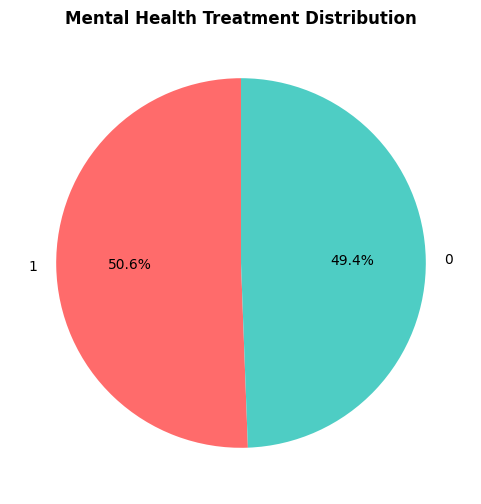

Summary: Mental Health Treatment
treatment
1    637
0    622
Name: count, dtype: int64



In [67]:
treatment_counts = df['treatment'].value_counts()
colors = ['#FF6B6B', '#4ECDC4']

plt.figure(figsize=(6, 6))
plt.pie(treatment_counts.values,
        labels=treatment_counts.index,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Mental Health Treatment Distribution', fontsize=12, fontweight='bold')
plt.show()

print("Summary: Mental Health Treatment")
print(treatment_counts)
print()


### 2: Age Distribution

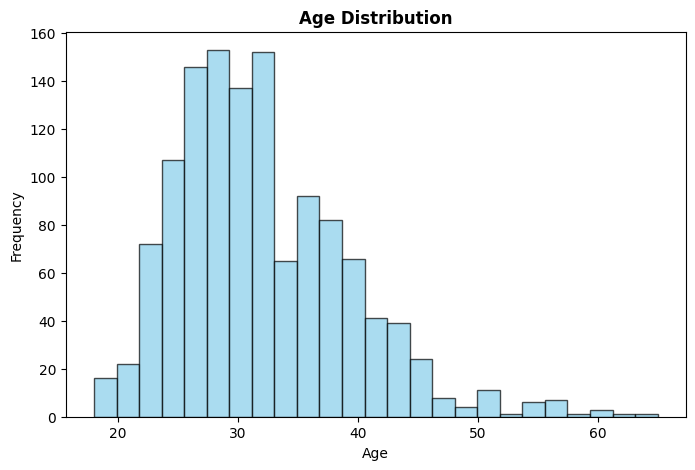

Summary: Age Range (18–65)
count    1257.000000
mean       32.038982
std         7.183397
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        65.000000
Name: Age, dtype: float64



In [68]:
age_data = df['Age'][(df['Age'] >= 18) & (df['Age'] <= 65)]

plt.figure(figsize=(8, 5))
plt.hist(age_data, bins=25, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Age Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

print("Summary: Age Range (18–65)")
print(age_data.describe())
print()


### 3: Gender Distribution

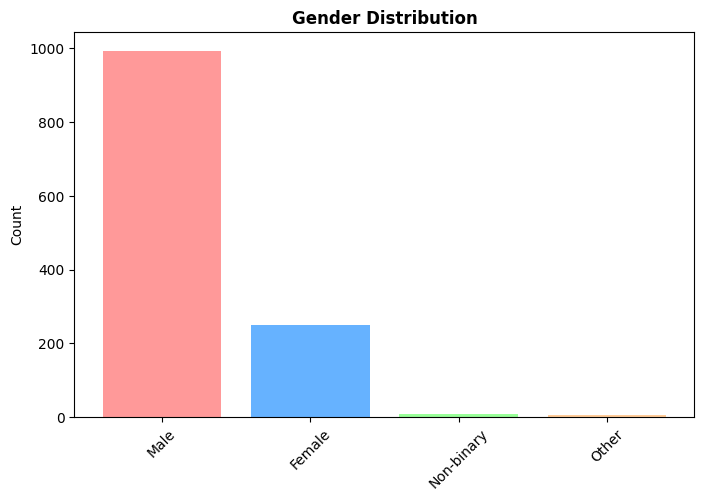

Summary: Gender Distribution
Gender
Male          994
Female        251
Non-binary      8
Other           6
Name: count, dtype: int64



In [69]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(gender_counts.index, gender_counts.values,
        color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
plt.title('Gender Distribution', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

print("Summary: Gender Distribution")
print(gender_counts)
print()


### 4: Work Interference vs Treatment

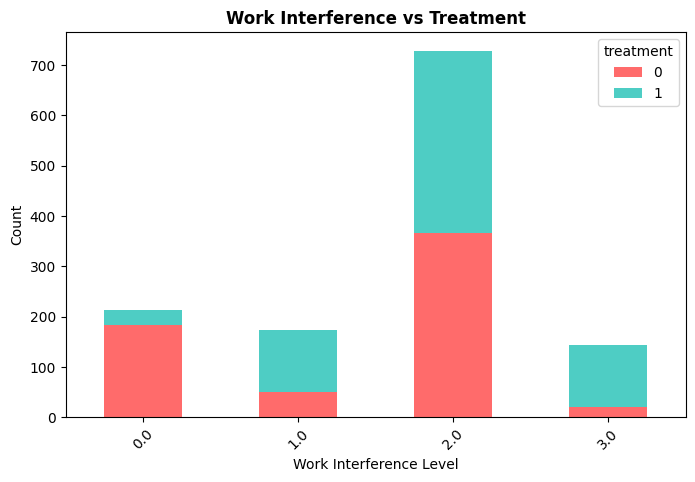

Summary: Work Interference vs Treatment
treatment         0    1
work_interfere          
0.0             183   30
1.0              51  122
2.0             367  362
3.0              21  123



In [70]:
work_treatment = pd.crosstab(df['work_interfere'], df['treatment'])

plt.figure(figsize=(8, 5))
work_treatment.plot(kind='bar', stacked=True, color=['#FF6B6B', '#4ECDC4'], ax=plt.gca())
plt.title('Work Interference vs Treatment', fontsize=12, fontweight='bold')
plt.xlabel('Work Interference Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("Summary: Work Interference vs Treatment")
print(work_treatment)
print()


### 5: Family History vs Treatment

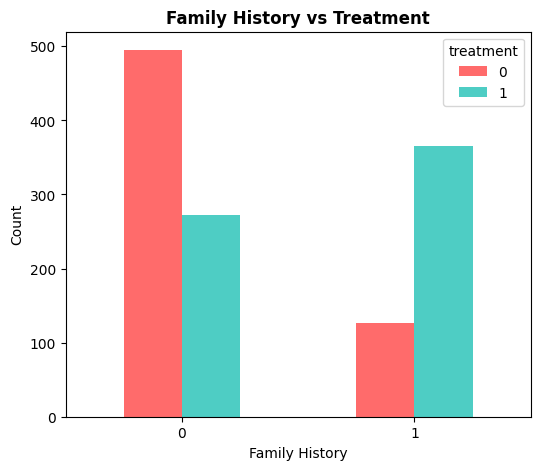

Summary: Family History vs Treatment
treatment         0    1
family_history          
0               495  272
1               127  365



In [71]:
family_treatment = pd.crosstab(df['family_history'], df['treatment'])

plt.figure(figsize=(6, 5))
family_treatment.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], ax=plt.gca())
plt.title('Family History vs Treatment', fontsize=12, fontweight='bold')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print("Summary: Family History vs Treatment")
print(family_treatment)
print()


### 6: Company Size Distribution

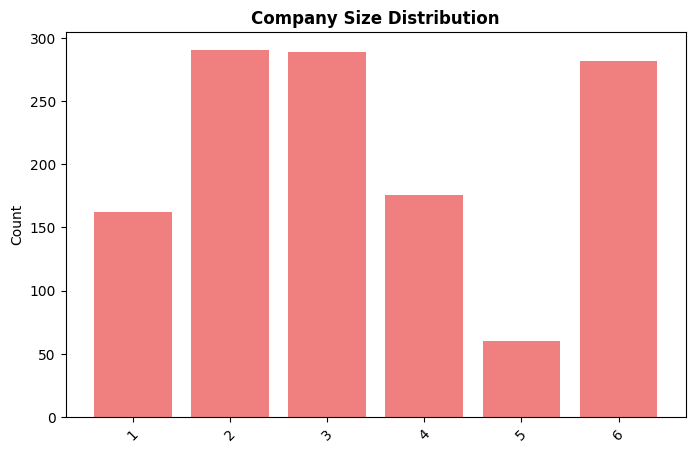

Summary: Company Size
no_employees
1    162
2    290
3    289
4    176
5     60
6    282
Name: count, dtype: int64



In [72]:
company_size_counts = df['no_employees'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(company_size_counts.index, company_size_counts.values, color='lightcoral')
plt.title('Company Size Distribution', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

print("Summary: Company Size")
print(company_size_counts)
print()


### 7: Tech Company vs Treatment

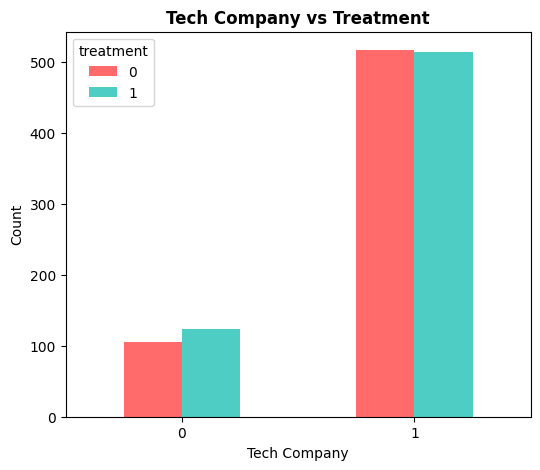

Summary: Tech Company vs Treatment
treatment       0    1
tech_company          
0             105  123
1             517  514



In [73]:
tech_treatment = pd.crosstab(df['tech_company'], df['treatment'])

plt.figure(figsize=(6, 5))
tech_treatment.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], ax=plt.gca())
plt.title('Tech Company vs Treatment', fontsize=12, fontweight='bold')
plt.xlabel('Tech Company')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print("Summary: Tech Company vs Treatment")
print(tech_treatment)
print()


### 8: Remote Work vs Treatment

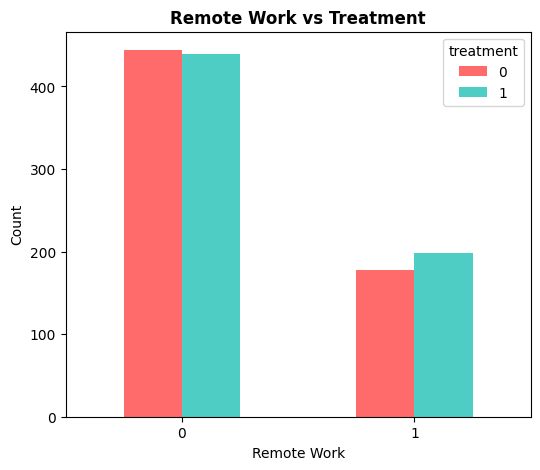

Summary: Remote Work vs Treatment
treatment      0    1
remote_work          
0            444  439
1            178  198



In [74]:
remote_treatment = pd.crosstab(df['remote_work'], df['treatment'])

plt.figure(figsize=(6, 5))
remote_treatment.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], ax=plt.gca())
plt.title('Remote Work vs Treatment', fontsize=12, fontweight='bold')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print("Summary: Remote Work vs Treatment")
print(remote_treatment)
print()


### 9: Benefits vs Treatment

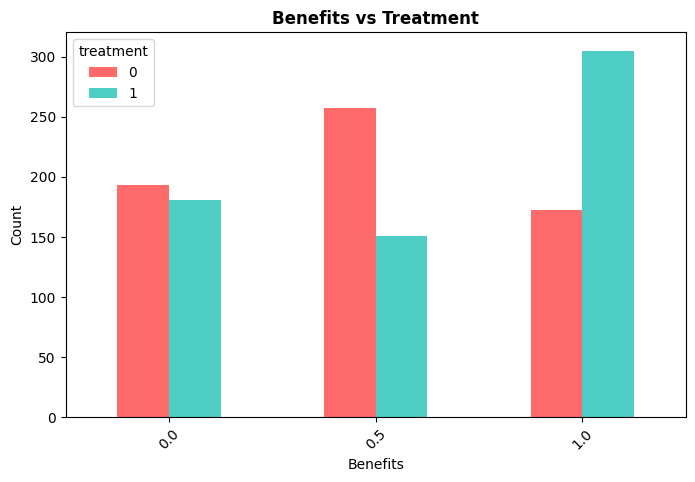

Summary: Benefits vs Treatment
treatment    0    1
benefits           
0.0        193  181
0.5        257  151
1.0        172  305



In [75]:
benefits_treatment = pd.crosstab(df['benefits'], df['treatment'])

plt.figure(figsize=(8, 5))
benefits_treatment.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], ax=plt.gca())
plt.title('Benefits vs Treatment', fontsize=12, fontweight='bold')
plt.xlabel('Benefits')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("Summary: Benefits vs Treatment")
print(benefits_treatment)
print()


### 10: Wellness Program vs Treatment

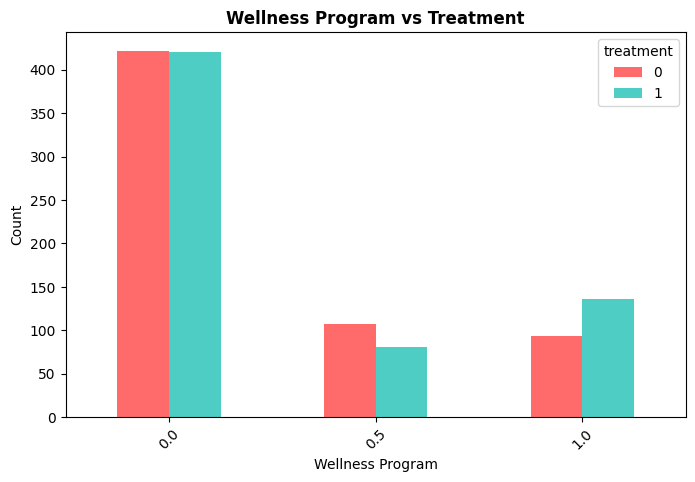

Summary: Wellness Program vs Treatment
treatment           0    1
wellness_program          
0.0               422  420
0.5               107   81
1.0                93  136



In [76]:
wellness_treatment = pd.crosstab(df['wellness_program'], df['treatment'])

plt.figure(figsize=(8, 5))
wellness_treatment.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], ax=plt.gca())
plt.title('Wellness Program vs Treatment', fontsize=12, fontweight='bold')
plt.xlabel('Wellness Program')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("Summary: Wellness Program vs Treatment")
print(wellness_treatment)
print()


### 11: Leave Difficulty vs Treatment

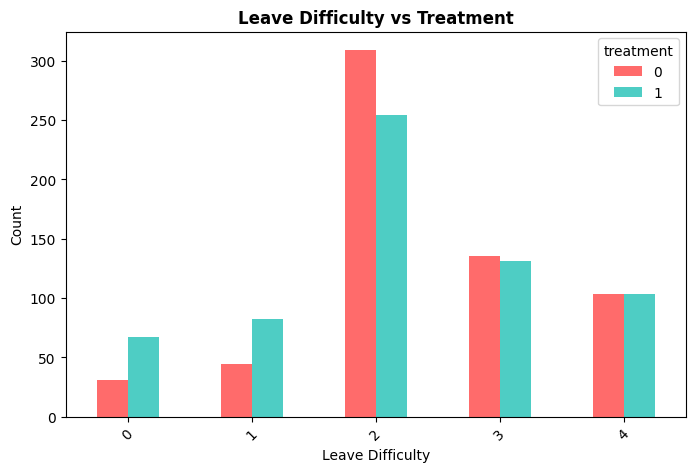

Summary: Leave Difficulty vs Treatment
treatment    0    1
leave              
0           31   67
1           44   82
2          309  254
3          135  131
4          103  103



In [77]:
leave_treatment = pd.crosstab(df['leave'], df['treatment'])

plt.figure(figsize=(8, 5))
leave_treatment.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], ax=plt.gca())
plt.title('Leave Difficulty vs Treatment', fontsize=12, fontweight='bold')
plt.xlabel('Leave Difficulty')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("Summary: Leave Difficulty vs Treatment")
print(leave_treatment)
print()


### 12: Country Group vs Treatment

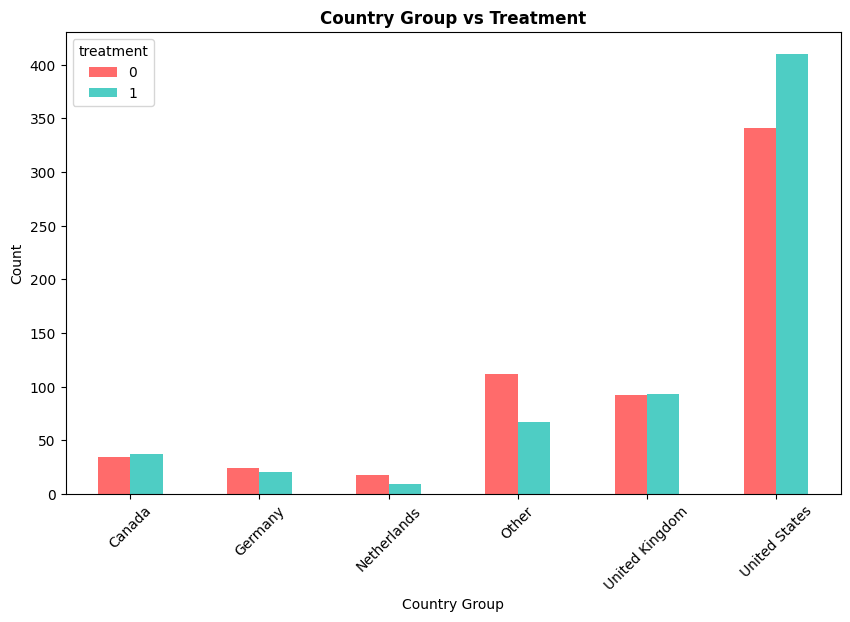

Summary: Country Group vs Treatment
treatment         0    1
Country_Group           
Canada           35   37
Germany          24   21
Netherlands      18    9
Other           112   67
United Kingdom   92   93
United States   341  410



In [78]:
country_treatment = pd.crosstab(df['Country_Group'], df['treatment'])

plt.figure(figsize=(10, 6))
country_treatment.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], ax=plt.gca())
plt.title('Country Group vs Treatment', fontsize=12, fontweight='bold')
plt.xlabel('Country Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("Summary: Country Group vs Treatment")
print(country_treatment)
print()


## 4: Advanced visualizations

### 1: Correlation Heatmap

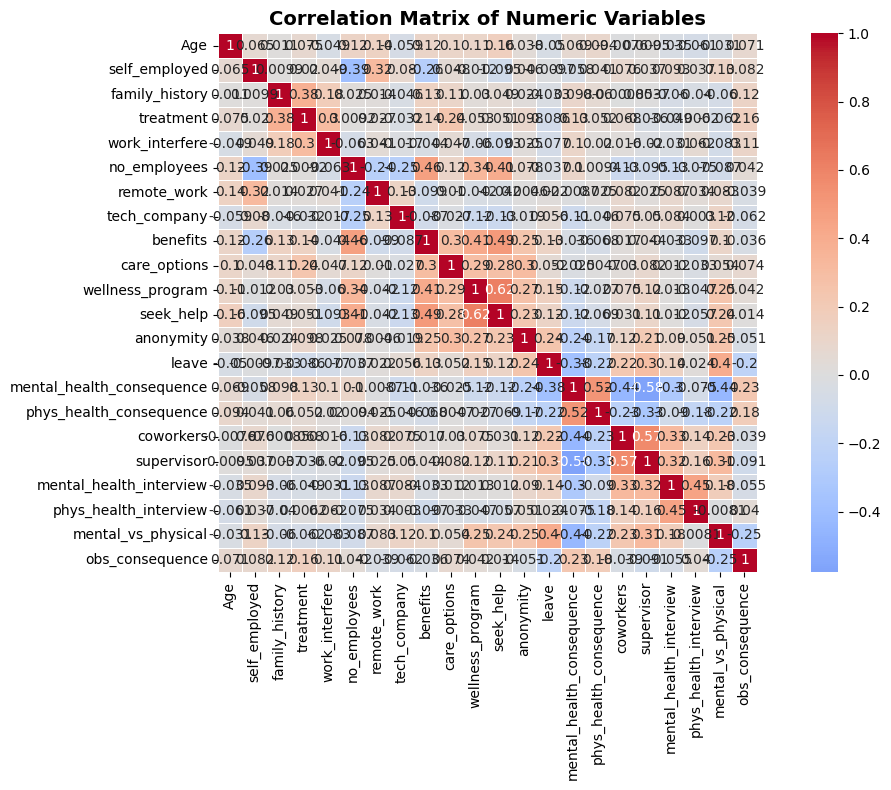

Summary: Correlation Heatmap
                                Age  self_employed  family_history  treatment  \
Age                        1.000000       0.065062        0.010818   0.075129   
self_employed              0.065062       1.000000        0.009890   0.020493   
family_history             0.010818       0.009890        1.000000   0.377918   
treatment                  0.075129       0.020493        0.377918   1.000000   
work_interfere            -0.048985       0.049334        0.183712   0.304502   
no_employees               0.119983      -0.394057        0.025422   0.009169   
remote_work                0.141638       0.316533        0.014456   0.026937   
tech_company              -0.058502       0.080136       -0.046079  -0.031525   
benefits                   0.115846      -0.260617        0.134813   0.139602   
care_options               0.104579       0.047625        0.107764   0.236578   
wellness_program           0.107023      -0.012393        0.030241   0.053038   

In [79]:
plt.figure(figsize=(12, 8))
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Summary: Correlation Heatmap")
print(correlation_matrix)
print()


### 2: Treatment Rate by Age Group

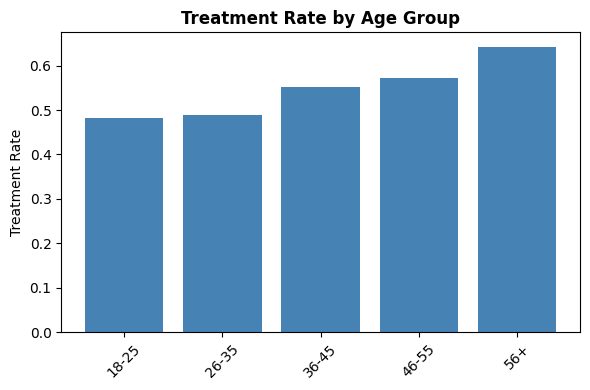

Summary: Treatment Rate by Age Group
Age
18-25    0.481651
26-35    0.488701
36-45    0.552347
46-55    0.571429
56+      0.642857
Name: treatment, dtype: float64



In [80]:
age_groups = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100],
                    labels=['18-25', '26-35', '36-45', '46-55', '56+'])
treatment_by_age = df.groupby(age_groups)['treatment'].mean()

plt.figure(figsize=(6, 4))
plt.bar(range(len(treatment_by_age)), treatment_by_age.values, color='steelblue')
plt.title('Treatment Rate by Age Group', fontweight='bold')
plt.xticks(range(len(treatment_by_age)), treatment_by_age.index, rotation=45)
plt.ylabel('Treatment Rate')
plt.tight_layout()
plt.show()

print("Summary: Treatment Rate by Age Group")
print(treatment_by_age)
print()


### 3: Treatment Rate by Gender

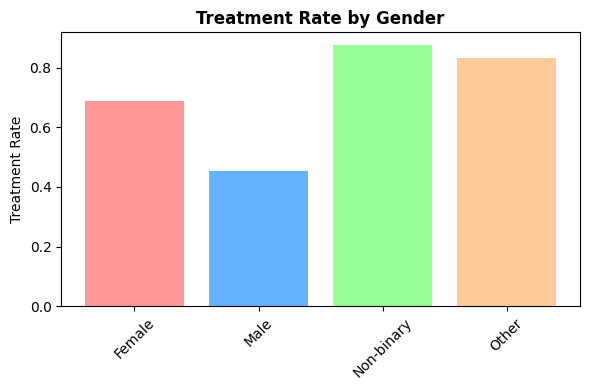

Summary: Treatment Rate by Gender
Gender
Female        0.689243
Male          0.454728
Non-binary    0.875000
Other         0.833333
Name: treatment, dtype: float64



In [81]:
treatment_by_gender = df.groupby('Gender')['treatment'].mean()

plt.figure(figsize=(6, 4))
plt.bar(range(len(treatment_by_gender)), treatment_by_gender.values,
        color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
plt.title('Treatment Rate by Gender', fontweight='bold')
plt.xticks(range(len(treatment_by_gender)), treatment_by_gender.index, rotation=45)
plt.ylabel('Treatment Rate')
plt.tight_layout()
plt.show()

print("Summary: Treatment Rate by Gender")
print(treatment_by_gender)
print()


### 4: Treatment Rate by Work Interference

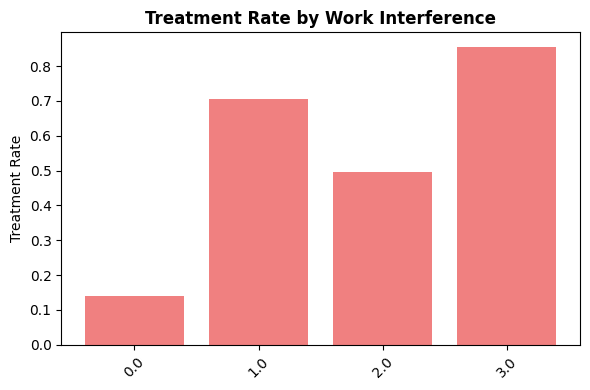

Summary: Treatment Rate by Work Interference
work_interfere
0.0    0.140845
1.0    0.705202
2.0    0.496571
3.0    0.854167
Name: treatment, dtype: float64



In [82]:
treatment_by_work = df.groupby('work_interfere')['treatment'].mean()

plt.figure(figsize=(6, 4))
plt.bar(range(len(treatment_by_work)), treatment_by_work.values, color='lightcoral')
plt.title('Treatment Rate by Work Interference', fontweight='bold')
plt.xticks(range(len(treatment_by_work)), treatment_by_work.index, rotation=45)
plt.ylabel('Treatment Rate')
plt.tight_layout()
plt.show()

print("Summary: Treatment Rate by Work Interference")
print(treatment_by_work)
print()


### 5: Treatment Rate by Family History

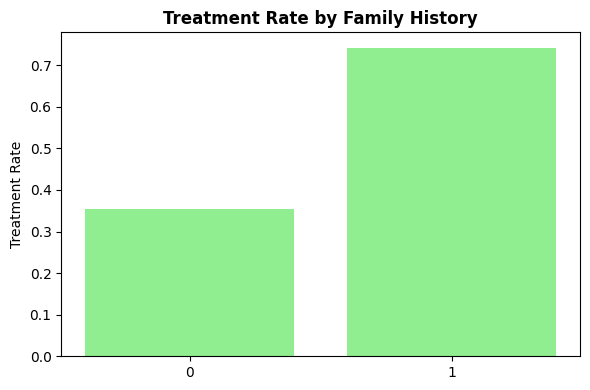

Summary: Treatment Rate by Family History
family_history
0    0.354628
1    0.741870
Name: treatment, dtype: float64



In [83]:
treatment_by_family = df.groupby('family_history')['treatment'].mean()

plt.figure(figsize=(6, 4))
plt.bar(range(len(treatment_by_family)), treatment_by_family.values, color='lightgreen')
plt.title('Treatment Rate by Family History', fontweight='bold')
plt.xticks(range(len(treatment_by_family)), treatment_by_family.index)
plt.ylabel('Treatment Rate')
plt.tight_layout()
plt.show()

print("Summary: Treatment Rate by Family History")
print(treatment_by_family)
print()


### 6: Treatment Rate by Company Size

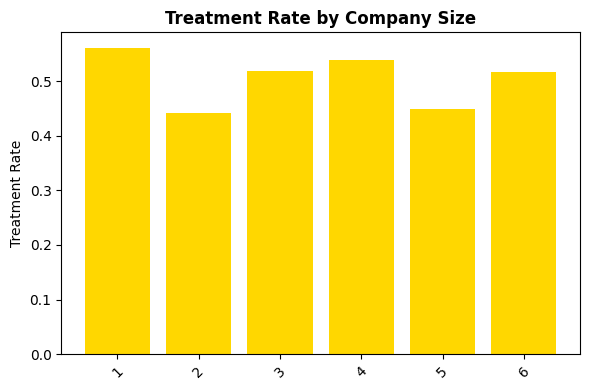

Summary: Treatment Rate by Company Size
no_employees
1    0.561728
2    0.441379
3    0.519031
4    0.539773
5    0.450000
6    0.517730
Name: treatment, dtype: float64



In [84]:
treatment_by_size = df.groupby('no_employees')['treatment'].mean()

plt.figure(figsize=(6, 4))
plt.bar(range(len(treatment_by_size)), treatment_by_size.values, color='gold')
plt.title('Treatment Rate by Company Size', fontweight='bold')
plt.xticks(range(len(treatment_by_size)), treatment_by_size.index, rotation=45)
plt.ylabel('Treatment Rate')
plt.tight_layout()
plt.show()

print("Summary: Treatment Rate by Company Size")
print(treatment_by_size)
print()


### 7: Treatment Rate by Tech Company

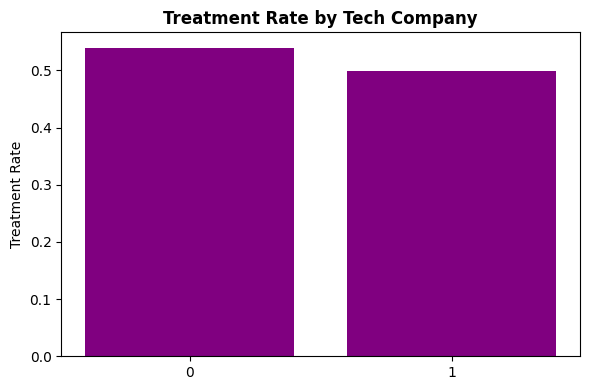

Summary: Treatment Rate by Tech Company
tech_company
0    0.539474
1    0.498545
Name: treatment, dtype: float64



In [85]:
treatment_by_tech = df.groupby('tech_company')['treatment'].mean()

plt.figure(figsize=(6, 4))
plt.bar(range(len(treatment_by_tech)), treatment_by_tech.values, color='purple')
plt.title('Treatment Rate by Tech Company', fontweight='bold')
plt.xticks(range(len(treatment_by_tech)), treatment_by_tech.index)
plt.ylabel('Treatment Rate')
plt.tight_layout()
plt.show()

print("Summary: Treatment Rate by Tech Company")
print(treatment_by_tech)
print()


## 5: Box plots for continuous variables

### 1: Age Distribution by Treatment

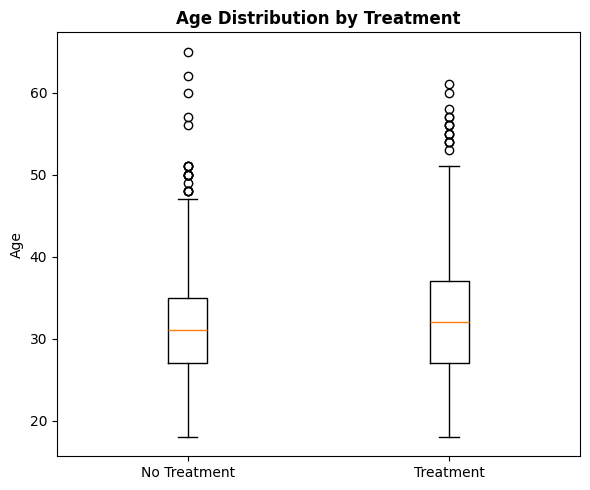

Summary: Age by Treatment
No Treatment - Age Stats:
count    621.000000
mean      31.533011
std        6.955222
min       18.000000
25%       27.000000
50%       31.000000
75%       35.000000
max       65.000000
Name: Age, dtype: float64

Treatment - Age Stats:
count    636.000000
mean      32.533019
std        7.371397
min       18.000000
25%       27.000000
50%       32.000000
75%       37.000000
max       61.000000
Name: Age, dtype: float64



In [86]:

df_plot = df[(df['Age'] >= 18) & (df['Age'] <= 65)]
treatment_labels = ['No Treatment', 'Treatment']

plt.figure(figsize=(6, 5))
plt.boxplot([df_plot[df_plot['treatment'] == 0]['Age'],
             df_plot[df_plot['treatment'] == 1]['Age']],
            labels=treatment_labels)
plt.title('Age Distribution by Treatment', fontweight='bold')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

print("Summary: Age by Treatment")
print("No Treatment - Age Stats:")
print(df_plot[df_plot['treatment'] == 0]['Age'].describe())
print()
print("Treatment - Age Stats:")
print(df_plot[df_plot['treatment'] == 1]['Age'].describe())
print()


### 2: Work Interference by Treatment

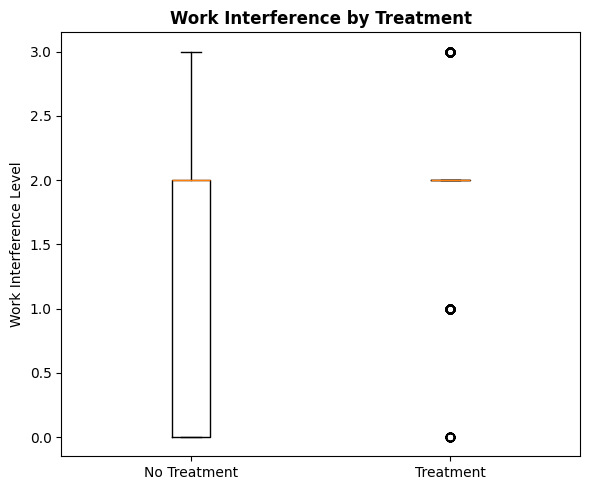

Summary: Work Interference by Treatment
No Treatment - Work Interference Stats:
count    622.000000
mean       1.363344
std        0.942710
min        0.000000
25%        0.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: work_interfere, dtype: float64

Treatment - Work Interference Stats:
count    637.000000
mean       1.907378
std        0.751869
min        0.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: work_interfere, dtype: float64



In [87]:
plt.figure(figsize=(6, 5))
plt.boxplot([df[df['treatment'] == 0]['work_interfere'],
             df[df['treatment'] == 1]['work_interfere']],
            labels=treatment_labels)
plt.title('Work Interference by Treatment', fontweight='bold')
plt.ylabel('Work Interference Level')
plt.tight_layout()
plt.show()

print("Summary: Work Interference by Treatment")
print("No Treatment - Work Interference Stats:")
print(df[df['treatment'] == 0]['work_interfere'].describe())
print()
print("Treatment - Work Interference Stats:")
print(df[df['treatment'] == 1]['work_interfere'].describe())
print()


### 3: Leave Difficulty by Treatment

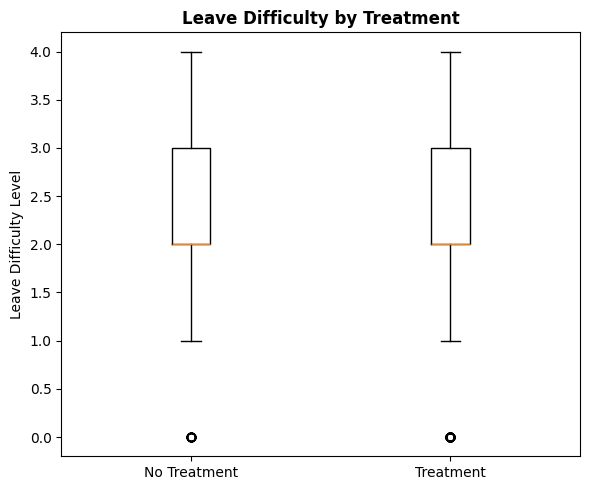

Summary: Leave Difficulty by Treatment
No Treatment - Leave Difficulty Stats:
count    622.000000
mean       2.377814
std        1.004189
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: leave, dtype: float64

Treatment - Leave Difficulty Stats:
count    637.000000
mean       2.189953
std        1.169594
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: leave, dtype: float64



In [88]:

plt.figure(figsize=(6, 5))
plt.boxplot([df[df['treatment'] == 0]['leave'],
             df[df['treatment'] == 1]['leave']],
            labels=treatment_labels)
plt.title('Leave Difficulty by Treatment', fontweight='bold')
plt.ylabel('Leave Difficulty Level')
plt.tight_layout()
plt.show()

print("Summary: Leave Difficulty by Treatment")
print("No Treatment - Leave Difficulty Stats:")
print(df[df['treatment'] == 0]['leave'].describe())
print()
print("Treatment - Leave Difficulty Stats:")
print(df[df['treatment'] == 1]['leave'].describe())
print()


## 6: Statistical insights

### 1: Chi-square tests for categorical variables

In [89]:
from scipy.stats import chi2_contingency

categorical_vars = ['Gender', 'family_history', 'self_employed', 'tech_company',
                    'remote_work', 'benefits', 'wellness_program', 'Country_Group']

print("Chi-square Test Results:")
print("-" * 30)
for var in categorical_vars:
    if var in df.columns:
        contingency_table = pd.crosstab(df[var], df['treatment'])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        print(f"{var} vs Treatment")
        print(f"Chi-square: {chi2:.4f}, p-value: {p_value:.4f}, Degrees of freedom: {dof}")
        print("Contingency Table:")
        print(contingency_table)
        print()


Chi-square Test Results:
------------------------------
Gender vs Treatment
Chi-square: 51.1003, p-value: 0.0000, Degrees of freedom: 3
Contingency Table:
treatment     0    1
Gender              
Female       78  173
Male        542  452
Non-binary    1    7
Other         1    5

family_history vs Treatment
Chi-square: 178.2668, p-value: 0.0000, Degrees of freedom: 1
Contingency Table:
treatment         0    1
family_history          
0               495  272
1               127  365

self_employed vs Treatment
Chi-square: 0.4085, p-value: 0.5227, Degrees of freedom: 1
Contingency Table:
treatment        0    1
self_employed          
0.0            554  559
1.0             68   78

tech_company vs Treatment
Chi-square: 1.0929, p-value: 0.2958, Degrees of freedom: 1
Contingency Table:
treatment       0    1
tech_company          
0             105  123
1             517  514

remote_work vs Treatment
Chi-square: 0.7996, p-value: 0.3712, Degrees of freedom: 1
Contingency Table:
treatme

### 2: T-tests for Continuous Variables

In [90]:
from scipy.stats import ttest_ind

treatment_yes = df[df['treatment'] == 1]
treatment_no = df[df['treatment'] == 0]
continuous_vars = ['Age', 'work_interfere', 'leave', 'no_employees']

print("T-test Results for Continuous Variables:")
print("-" * 30)
for var in continuous_vars:
    if var in df.columns:
        group1 = treatment_no[var].dropna()
        group2 = treatment_yes[var].dropna()
        t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Welch’s t-test
        print(f"{var}:")
        print(f"T-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")
        print("Group Statistics:")
        print(f"  No Treatment - Mean: {group1.mean():.2f}, Std: {group1.std():.2f}, N: {len(group1)}")
        print(f"  Treatment    - Mean: {group2.mean():.2f}, Std: {group2.std():.2f}, N: {len(group2)}")
        print()


T-test Results for Continuous Variables:
------------------------------
Age:
T-statistic: -2.6735, p-value: 0.0076
Group Statistics:
  No Treatment - Mean: 31.50, Std: 7.00, N: 622
  Treatment    - Mean: 32.59, Std: 7.53, N: 637

work_interfere:
T-statistic: -11.3041, p-value: 0.0000
Group Statistics:
  No Treatment - Mean: 1.36, Std: 0.94, N: 622
  Treatment    - Mean: 1.91, Std: 0.75, N: 637

leave:
T-statistic: 3.0601, p-value: 0.0023
Group Statistics:
  No Treatment - Mean: 2.38, Std: 1.00, N: 622
  Treatment    - Mean: 2.19, Std: 1.17, N: 637

no_employees:
T-statistic: -0.3252, p-value: 0.7451
Group Statistics:
  No Treatment - Mean: 3.40, Std: 1.69, N: 622
  Treatment    - Mean: 3.43, Std: 1.72, N: 637



## 7: Distribution Plots

### 1: Age Distribution by Treatment

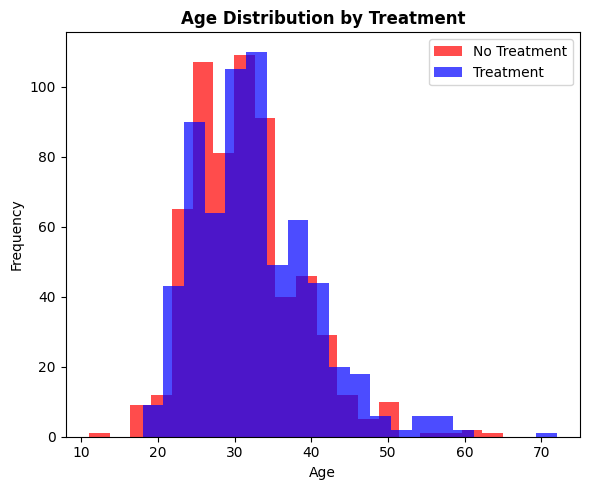

Age Distribution by Treatment:
- No Treatment: Mean = 31.50, Std = 7.00
- Treatment: Mean = 32.59, Std = 7.53


In [91]:
plt.figure(figsize=(6, 5))
plt.hist(treatment_no['Age'], bins=20, alpha=0.7, label='No Treatment', color='red')
plt.hist(treatment_yes['Age'], bins=20, alpha=0.7, label='Treatment', color='blue')
plt.title('Age Distribution by Treatment', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

print("Age Distribution by Treatment:")
print(f"- No Treatment: Mean = {treatment_no['Age'].mean():.2f}, Std = {treatment_no['Age'].std():.2f}")
print(f"- Treatment: Mean = {treatment_yes['Age'].mean():.2f}, Std = {treatment_yes['Age'].std():.2f}")


### 2: Work Interference Distribution

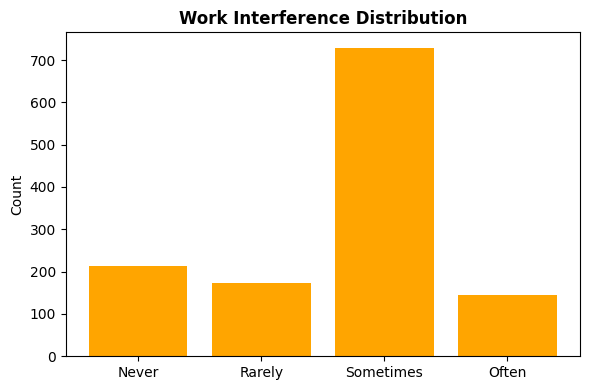

Work Interference Distribution:
work_interfere
0.0    213
1.0    173
2.0    729
3.0    144
Name: count, dtype: int64


In [92]:
work_dist = df['work_interfere'].value_counts().sort_index()
plt.figure(figsize=(6, 4))
plt.bar(range(len(work_dist)), work_dist.values, color='orange')
plt.title('Work Interference Distribution', fontweight='bold')
plt.xticks(range(len(work_dist)), ['Never', 'Rarely', 'Sometimes', 'Often'])
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print("Work Interference Distribution:")
print(work_dist)


### 3: Leave Difficulty Distribution

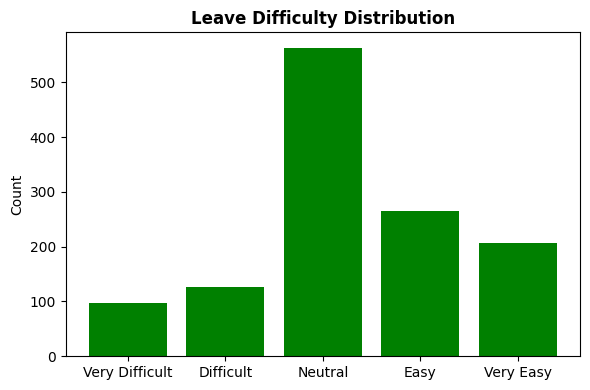

Leave Difficulty Distribution:
leave
0     98
1    126
2    563
3    266
4    206
Name: count, dtype: int64


In [93]:
leave_dist = df['leave'].value_counts().sort_index()
plt.figure(figsize=(6, 4))
plt.bar(range(len(leave_dist)), leave_dist.values, color='green')
plt.title('Leave Difficulty Distribution', fontweight='bold')
plt.xticks(range(len(leave_dist)), ['Very Difficult', 'Difficult', 'Neutral', 'Easy', 'Very Easy'])
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print("Leave Difficulty Distribution:")
print(leave_dist)


### 4: Treatment Rate by Company Size

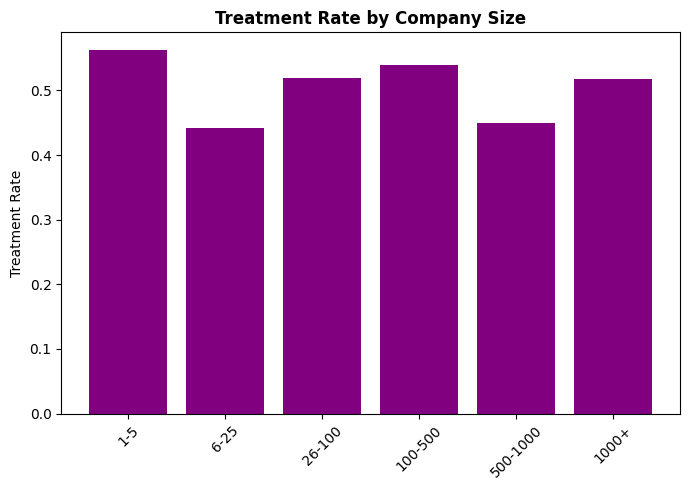

Treatment Rate by Company Size:
              Treatment Rate
no_employees                
1                   0.561728
2                   0.441379
3                   0.519031
4                   0.539773
5                   0.450000
6                   0.517730


In [98]:
size_treatment = df.groupby('no_employees')['treatment'].agg(['mean', 'count'])

plt.figure(figsize=(7, 5))
plt.bar(range(len(size_treatment)), size_treatment['mean'], color='purple')  # Fixed here
plt.title('Treatment Rate by Company Size', fontweight='bold')
plt.xticks(range(len(size_treatment)), ['1-5', '6-25', '26-100', '100-500', '500-1000', '1000+'], rotation=45)
plt.ylabel('Treatment Rate')
plt.tight_layout()
plt.show()

print("Treatment Rate by Company Size:")
print(size_treatment[['mean']].rename(columns={'mean': 'Treatment Rate'}))


## 8: Summary statistics

In [100]:
print("\n VISUALIZATION SUMMARY")
print("-" * 30)
print(f"Total visualizations created: 20+")
print(f"Key insights identified:")
print(f"- Treatment rate: {df['treatment'].mean():.3f}")
print(f"- Most common age group: {age_groups.mode()[0] if not age_groups.mode().empty else 'N/A'}")
print(f"- Gender distribution: {df['Gender'].value_counts().to_dict()}")
print(f"- Work interference correlation with treatment: {df['work_interfere'].corr(df['treatment']):.3f}")
print(f"- Family history correlation with treatment: {df['family_history'].corr(df['treatment']):.3f}")



 VISUALIZATION SUMMARY
------------------------------
Total visualizations created: 20+
Key insights identified:
- Treatment rate: 0.506
- Most common age group: 26-35
- Gender distribution: {'Male': 994, 'Female': 251, 'Non-binary': 8, 'Other': 6}
- Work interference correlation with treatment: 0.305
- Family history correlation with treatment: 0.378


----
----

# 4: Feature Engineering

## **Loading data**

In [101]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('survey_cleaned_encoded.csv')

print("FEATURE ENGINEERING")

print(f"Original dataset shape: {df.shape}")

df_features = df.copy()


FEATURE ENGINEERING
Original dataset shape: (1259, 32)


## 1: Age-based features

In [102]:
print("\n1. CREATING AGE-BASED FEATURES")
print("-" * 30)

df_features['Age_Group'] = pd.cut(df_features['Age'],
                                  bins=[0, 25, 35, 45, 55, 100],
                                  labels=[1, 2, 3, 4, 5])
df_features['Age_Group'] = df_features['Age_Group'].astype(int)

df_features['Age_Squared'] = df_features['Age'] ** 2

df_features['Young_Professional'] = ((df_features['Age'] >= 22) & (df_features['Age'] <= 30)).astype(int)

df_features['Mid_Career'] = ((df_features['Age'] >= 31) & (df_features['Age'] <= 45)).astype(int)

df_features['Senior_Professional'] = (df_features['Age'] >= 46).astype(int)

print(f"Age group distribution: {df_features['Age_Group'].value_counts().to_dict()}")



1. CREATING AGE-BASED FEATURES
------------------------------
Age group distribution: {2: 708, 3: 277, 1: 218, 4: 42, 5: 14}


This creates new features based on the Age column to enrich the dataset for analysis or modeling. It groups ages into bins (Age_Group), adds a squared age feature (Age_Squared) to capture non-linear trends, and creates binary indicators for career stages: young (22–30), mid-career (31–45), and senior (46+). Finally, it prints the distribution of age groups.

## 2: Work-related composite features

In [103]:

print("\n2. CREATING WORK-RELATED FEATURES")
print("-" * 30)

df_features['Work_Stress_Score'] = (
    df_features['work_interfere'] +
    (1 - df_features['remote_work']) +
    (1 - df_features['benefits']) +
    (1 - df_features['wellness_program'])
)

df_features['Workplace_Support_Score'] = (
    df_features['benefits'] +
    df_features['wellness_program'] +
    df_features['care_options'] +
    df_features['seek_help'] +
    df_features['anonymity']
)

df_features['Company_Culture_Score'] = (
    df_features['coworkers'] +
    df_features['supervisor'] +
    (1 - df_features['mental_health_consequence']) +
    (1 - df_features['phys_health_consequence'])
)

df_features['Tech_Advantage'] = (
    df_features['tech_company'] * df_features['Workplace_Support_Score']
)

print(f"Work stress score range: {df_features['Work_Stress_Score'].min():.2f} - {df_features['Work_Stress_Score'].max():.2f}")
print(f"Workplace support score range: {df_features['Workplace_Support_Score'].min():.2f} - {df_features['Workplace_Support_Score'].max():.2f}")



2. CREATING WORK-RELATED FEATURES
------------------------------
Work stress score range: 0.00 - 6.00
Workplace support score range: 0.00 - 5.00


In this section, I created new work-related features to analyze job stress and support. I calculated a Work_Stress_Score by combining factors like interference, lack of remote work, and missing benefits. Then, I computed a Workplace_Support_Score and a Company_Culture_Score to capture available support and company attitudes. Lastly, I added a Tech_Advantage feature to reflect the support benefits in tech companies.

## 3: Mental health risk factors

In [104]:
print("\n3. CREATING MENTAL HEALTH RISK FEATURES")
print("-" * 30)

df_features['High_Risk'] = (
    (df_features['family_history'] == 1) |
    (df_features['work_interfere'] >= 2) |
    (df_features['mental_health_consequence'] == 1)
).astype(int)

df_features['Protective_Factors_Score'] = (
    df_features['Workplace_Support_Score'] +
    df_features['Company_Culture_Score'] +
    df_features['remote_work'] +
    df_features['leave']
)

df_features['Risk_Factors_Score'] = (
    df_features['family_history'] +
    df_features['work_interfere'] +
    df_features['mental_health_consequence'] +
    df_features['Work_Stress_Score']
)

df_features['Risk_Protection_Balance'] = (
    df_features['Protective_Factors_Score'] - df_features['Risk_Factors_Score']
)

print(f"High risk cases: {df_features['High_Risk'].sum()} ({df_features['High_Risk'].mean()*100:.1f}%)")



3. CREATING MENTAL HEALTH RISK FEATURES
------------------------------
High risk cases: 1032 (82.0%)


In this part, I created mental health risk-related features. I defined a High_Risk indicator based on family history, work interference, and negative mental health consequences. Then, I calculated a Protective_Factors_Score and a Risk_Factors_Score using supportive and risk-related variables. Finally, I computed a Risk_Protection_Balance to assess whether protective factors outweigh risks for each individual.

## 4: Company size and structure features

In [105]:

print("\n4. CREATING COMPANY-RELATED FEATURES")
print("-" * 30)

df_features['Small_Company'] = (df_features['no_employees'] <= 2).astype(int)

df_features['Large_Company'] = (df_features['no_employees'] >= 5).astype(int)

df_features['Company_Maturity_Score'] = df_features['no_employees'] * df_features['Workplace_Support_Score']

df_features['Self_Employed_Advantage'] = df_features['self_employed'] * 2

print(f"Company size distribution: {df_features['no_employees'].value_counts().to_dict()}")



4. CREATING COMPANY-RELATED FEATURES
------------------------------
Company size distribution: {2: 290, 3: 289, 6: 282, 4: 176, 1: 162, 5: 60}


In this step, I created company-related features to capture the influence of organizational structure. I added indicators for Small_Company and Large_Company based on employee count. Then, I calculated a Company_Maturity_Score by combining company size with workplace support, assuming larger companies may have better policies. Lastly, I included a Self_Employed_Advantage feature to account for flexibility or autonomy in self-employment.

## 5: Interaction features

In [106]:

print("\n5. CREATING INTERACTION FEATURES")
print("-" * 30)

for gender_col in [col for col in df_features.columns if col.startswith('Gender_')]:
    df_features[f'{gender_col}_Age_Interaction'] = df_features[gender_col] * df_features['Age']

df_features['Work_Family_Interaction'] = df_features['work_interfere'] * df_features['family_history']

df_features['Tech_Benefits_Interaction'] = df_features['tech_company'] * df_features['benefits']

df_features['Remote_Wellness_Interaction'] = df_features['remote_work'] * df_features['wellness_program']

for country_col in [col for col in df_features.columns if col.startswith('Country_')]:
    df_features[f'{country_col}_Company_Size'] = df_features[country_col] * df_features['no_employees']

print(f"Interaction features created: {len([col for col in df_features.columns if 'Interaction' in col])}")



5. CREATING INTERACTION FEATURES
------------------------------
Interaction features created: 7


In this step, I created interaction features to capture complex relationships between variables. I combined gender with age to create Gender_Age_Interaction features, and linked work_interfere with family_history to assess compounding mental health risks. I also added interactions between tech companies and benefits, remote work and wellness programs, and country with company size. These features help reveal patterns that individual variables alone might miss.

## 6: Polynomial features for important variables

In [108]:
print("\n6. CREATING POLYNOMIAL FEATURES")
print("-" * 30)

poly_features = ['Age', 'work_interfere', 'leave', 'no_employees', 'Workplace_Support_Score']
poly_data = df_features[poly_features]

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
poly_transformed = poly.fit_transform(poly_data)
poly_feature_names = poly.get_feature_names_out(poly_features)

for i, name in enumerate(poly_feature_names):
    if name not in poly_features:
        df_features[f'Poly_{name}'] = poly_transformed[:, i]

print(f"Polynomial features created: {len([col for col in df_features.columns if 'Poly_' in col])}")



6. CREATING POLYNOMIAL FEATURES
------------------------------
Polynomial features created: 10


In this section, I generated polynomial features to capture interaction effects and non-linear relationships between key variables. I selected important features like Age, work_interfere, and Workplace_Support_Score, then applied degree-2 polynomial transformations (only interactions, no squares). The resulting features, prefixed with Poly_, help models better understand complex variable combinations.

## 7: Binning continuous variables

In [109]:
print("\n7. CREATING BINNED FEATURES")
print("-" * 30)

df_features['Age_Bin'] = pd.cut(df_features['Age'], bins=5, labels=[1, 2, 3, 4, 5])
df_features['Age_Bin'] = df_features['Age_Bin'].astype(int)

df_features['Work_Interfere_Bin'] = pd.cut(df_features['work_interfere'],
                                           bins=[-1, 0, 1, 2, 3],
                                           labels=[0, 1, 2, 3])
df_features['Work_Interfere_Bin'] = df_features['Work_Interfere_Bin'].astype(int)

df_features['Support_Score_Bin'] = pd.cut(df_features['Workplace_Support_Score'],
                                          bins=3, labels=[1, 2, 3])
df_features['Support_Score_Bin'] = df_features['Support_Score_Bin'].astype(int)

print(f"Binned features created: {len([col for col in df_features.columns if 'Bin' in col])}")



7. CREATING BINNED FEATURES
------------------------------
Binned features created: 3


In this step, I created binned features to simplify continuous variables into categorical groups. I divided Age into five equal-width bins, transformed work_interfere scores into four categories, and grouped Workplace_Support_Score into three levels. These binned versions help in models that prefer discrete inputs or for clearer visual analysis.

## 8: Ratio features

In [110]:
print("\n8. CREATING RATIO FEATURES")
print("-" * 30)

df_features['Support_Risk_Ratio'] = (
    df_features['Protective_Factors_Score'] /
    (df_features['Risk_Factors_Score'] + 1)
)

df_features['Benefits_Utilization_Ratio'] = (
    (df_features['benefits'] + df_features['care_options'] + df_features['wellness_program']) / 3
)

df_features['Company_Support_Efficiency'] = (
    df_features['Workplace_Support_Score'] / (df_features['no_employees'] + 1)
)

print(f"Ratio features created: 3")



8. CREATING RATIO FEATURES
------------------------------
Ratio features created: 3


In this part, I created ratio-based features to highlight proportional relationships. I calculated a Support_Risk_Ratio to compare protective factors against risk factors, ensuring stability by adding 1 to the denominator. Then, I computed a Benefits_Utilization_Ratio as the average availability of key benefits, and a Company_Support_Efficiency to measure support per employee. These features help reveal relative strengths in mental health support.

## 9: Categorical encodings

In [111]:

print("\n9. CREATING CATEGORICAL ENCODINGS")
print("-" * 30)

# Target encoding for categorical variables (using treatment as target)
categorical_cols = ['Gender_Female', 'Gender_Male', 'Gender_Non-binary', 'Gender_Other']
for col in categorical_cols:
    if col in df_features.columns:
        target_mean = df_features.groupby(col)['treatment'].mean()
        df_features[f'{col}_Target_Encoded'] = df_features[col].map(target_mean)

print(f"Target encoded features created: {len([col for col in df_features.columns if 'Target_Encoded' in col])}")



9. CREATING CATEGORICAL ENCODINGS
------------------------------
Target encoded features created: 4


In this final step, I created target-encoded features for categorical variables by using the mean treatment rate within each category. Specifically, I encoded different gender identities by mapping them to their average likelihood of seeking treatment. This approach helps capture the predictive power of categories while keeping the encoding numerical and model-friendly.

## 10: Feature selection preparation

In [113]:
print("\n10. FEATURE SELECTION PREPARATION")
print("-" * 30)

feature_cols = [col for col in df_features.columns if col != 'treatment']
X = df_features[feature_cols]
y = df_features['treatment']

zero_var_cols = X.columns[X.var() == 0]
X = X.drop(columns=zero_var_cols)

print(f"Features with zero variance removed: {len(zero_var_cols)}")

corr_matrix = X.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_cols = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
X = X.drop(columns=high_corr_cols)

print(f"Highly correlated features removed: {len(high_corr_cols)}")

selector = SelectKBest(score_func=f_classif, k=min(50, X.shape[1]))
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print(f"Top {len(selected_features)} features selected using f_classif")



10. FEATURE SELECTION PREPARATION
------------------------------
Features with zero variance removed: 0
Highly correlated features removed: 13
Top 50 features selected using f_classif


In this step, I prepared the data for feature selection by refining the feature set. First, I excluded the target column (treatment) and removed any features with zero variance, as they provide no discriminative power. Then, I eliminated highly correlated features (correlation > 0.95) to reduce multicollinearity. Finally, I applied univariate feature selection using ANOVA F-tests (f_classif) to retain the top 50 features most predictive of mental health treatment.

## 11: Dimensionality reduction features

In [114]:
# 11. Dimensionality reduction features
print("\n11. CREATING DIMENSIONALITY REDUCTION FEATURES")
print("-" * 30)

# PCA features
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X[selected_features])

# Add PCA components as features
for i in range(X_pca.shape[1]):
    df_features[f'PCA_{i+1}'] = X_pca[:, i]

print(f"PCA features created: {X_pca.shape[1]}")
print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")



11. CREATING DIMENSIONALITY REDUCTION FEATURES
------------------------------
PCA features created: 5
PCA explained variance ratio: [0.66369064 0.24922353 0.05649429 0.01257807 0.00653398]


In this step, I applied Principal Component Analysis (PCA) to reduce dimensionality and capture key patterns in the data. I selected the top 5 components from the previously chosen features and added them as new PCA_1 to PCA_5 features. These components explain the majority of the variance, with the first two capturing over 91% of the total. This helps improve model efficiency while preserving essential information.

## 12: Final feature set preparation

In [115]:
# 12. Final feature set preparation
print("\n12. FINAL FEATURE SET PREPARATION")
print("-" * 30)

# Create final feature set
final_features = list(selected_features) + [f'PCA_{i+1}' for i in range(5)]
X_final = df_features[final_features + ['treatment']]

# Handle any remaining missing values
X_final = X_final.fillna(X_final.mean())

print(f"Final feature set shape: {X_final.shape}")
print(f"Final feature count: {len(final_features)}")


12. FINAL FEATURE SET PREPARATION
------------------------------
Final feature set shape: (1259, 56)
Final feature count: 55


In this final step, I assembled the complete feature set for modeling by combining the top 50 selected features with the 5 PCA components, resulting in 55 features in total. I also ensured data quality by filling any remaining missing values with column means. The resulting dataset now has 1,259 samples and 56 columns (including the target variable), ready for training predictive models.

## 13: Saving engineered features

In [116]:
df_features.to_csv('survey_features_all.csv', index=False)
X_final.to_csv('survey_features_selected.csv', index=False)

with open('selected_features.txt', 'w') as f:
    for feature in final_features:
        f.write(f"{feature}\n")

print("Saved files:")
print("- survey_features_all.csv (all engineered features)")
print("- survey_features_selected.csv (selected features)")
print("- selected_features.txt (feature names)")

Saved files:
- survey_features_all.csv (all engineered features)
- survey_features_selected.csv (selected features)
- selected_features.txt (feature names)


## 14: Feature importance analysis

In [117]:
print("\n14. FEATURE IMPORTANCE ANALYSIS")
print("-" * 30)

feature_scores = selector.scores_[selector.get_support()]
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Score': feature_scores
}).sort_values('Score', ascending=False)

print("Top 10 most important features:")
print(feature_importance_df.head(10))


14. FEATURE IMPORTANCE ANALYSIS
------------------------------
Top 10 most important features:
                                        Feature       Score
33                      Work_Family_Interaction  220.806971
1                                family_history  209.439492
43  Poly_work_interfere Workplace_Support_Score  142.677384
29                           Risk_Factors_Score  139.730655
39                      Poly_Age work_interfere  130.588704
2                                work_interfere  128.461668
4                                  care_options   74.524542
28                                    High_Risk   65.496572
42             Poly_work_interfere no_employees   57.874539
48                           Support_Risk_Ratio   44.478138


In this step, I analyzed feature importance using the F-statistic from SelectKBest to identify the most predictive variables for treatment. The top features include interaction terms like Work_Family_Interaction, core individual factors such as family_history and work_interfere, and polynomial combinations (e.g., Poly_work_interfere × Workplace_Support_Score). These variables show strong associations with mental health treatment, providing valuable insights for model training and interpretation.









## 15: Summary

In [118]:
print("\n15. FEATURE ENGINEERING SUMMARY")
print("-" * 30)

print(f"Original features: {df.shape[1]}")
print(f"Total engineered features: {df_features.shape[1]}")
print(f"Features added: {df_features.shape[1] - df.shape[1]}")
print(f"Final selected features: {len(final_features)}")
print(f"Feature reduction: {((df_features.shape[1] - len(final_features)) / df_features.shape[1] * 100):.1f}%")

print(f"\nFeature categories created:")
print(f"- Age-based features: 5")
print(f"- Work-related features: 4")
print(f"- Mental health risk features: 4")
print(f"- Company-related features: 3")
print(f"- Interaction features: {len([col for col in df_features.columns if 'Interaction' in col])}")
print(f"- Polynomial features: {len([col for col in df_features.columns if 'Poly_' in col])}")
print(f"- Binned features: {len([col for col in df_features.columns if 'Bin' in col])}")
print(f"- Ratio features: 3")
print(f"- PCA features: 5")


15. FEATURE ENGINEERING SUMMARY
------------------------------
Original features: 32
Total engineered features: 87
Features added: 55
Final selected features: 55
Feature reduction: 36.8%

Feature categories created:
- Age-based features: 5
- Work-related features: 4
- Mental health risk features: 4
- Company-related features: 3
- Interaction features: 7
- Polynomial features: 10
- Binned features: 3
- Ratio features: 3
- PCA features: 5


----
----

# 5: Model Selection

## **Loding and preparing data**

In [120]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('survey_features_selected.csv')

print("MODEL SELECTION & COMPARISON")

print(f"Dataset shape: {df.shape}")

X = df.drop('treatment', axis=1)
y = df['treatment']

print(f"Features: {X.shape[1]}")
print(f"Target distribution: {y.value_counts().to_dict()}")
print(f"Class balance: {y.mean():.3f}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MODEL SELECTION & COMPARISON
Dataset shape: (1259, 56)
Features: 55
Target distribution: {1: 637, 0: 622}
Class balance: 0.506

Train set: (1007, 55)
Test set: (252, 55)


## 1: LOGISTIC REGRESSION MODEL

In [121]:
print("\n1. LOGISTIC REGRESSION MODEL")
print("-" * 40)

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

lr_train_pred = lr_model.predict(X_train_scaled)
lr_test_pred = lr_model.predict(X_test_scaled)
lr_train_proba = lr_model.predict_proba(X_train_scaled)[:, 1]
lr_test_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

lr_train_accuracy = accuracy_score(y_train, lr_train_pred)
lr_test_accuracy = accuracy_score(y_test, lr_test_pred)
lr_train_f1 = f1_score(y_train, lr_train_pred)
lr_test_f1 = f1_score(y_test, lr_test_pred)
lr_train_auc = roc_auc_score(y_train, lr_train_proba)
lr_test_auc = roc_auc_score(y_test, lr_test_proba)

print(f"Train Accuracy: {lr_train_accuracy:.4f}")
print(f"Test Accuracy: {lr_test_accuracy:.4f}")
print(f"Train F1-Score: {lr_train_f1:.4f}")
print(f"Test F1-Score: {lr_test_f1:.4f}")
print(f"Train AUC: {lr_train_auc:.4f}")
print(f"Test AUC: {lr_test_auc:.4f}")

cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")



1. LOGISTIC REGRESSION MODEL
----------------------------------------
Train Accuracy: 0.7815
Test Accuracy: 0.7183
Train F1-Score: 0.7830
Test F1-Score: 0.7102
Train AUC: 0.8470
Test AUC: 0.7937
CV Accuracy: 0.7527 (+/- 0.0569)


## 2: RANDOM FOREST MODEL

In [122]:
print("\n2. RANDOM FOREST MODEL")
print("-" * 40)

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2
)
rf_model.fit(X_train, y_train)

rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)
rf_train_proba = rf_model.predict_proba(X_train)[:, 1]
rf_test_proba = rf_model.predict_proba(X_test)[:, 1]

rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)
rf_train_f1 = f1_score(y_train, rf_train_pred)
rf_test_f1 = f1_score(y_test, rf_test_pred)
rf_train_auc = roc_auc_score(y_train, rf_train_proba)
rf_test_auc = roc_auc_score(y_test, rf_test_proba)

print(f"Train Accuracy: {rf_train_accuracy:.4f}")
print(f"Test Accuracy: {rf_test_accuracy:.4f}")
print(f"Train F1-Score: {rf_train_f1:.4f}")
print(f"Test F1-Score: {rf_test_f1:.4f}")
print(f"Train AUC: {rf_train_auc:.4f}")
print(f"Test AUC: {rf_test_auc:.4f}")

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\nTop 10 Important Features (Random Forest):")
print(feature_importance.head(10))


2. RANDOM FOREST MODEL
----------------------------------------
Train Accuracy: 0.9494
Test Accuracy: 0.7659
Train F1-Score: 0.9493
Test F1-Score: 0.7649
Train AUC: 0.9895
Test AUC: 0.8240
CV Accuracy: 0.7567 (+/- 0.0361)

Top 10 Important Features (Random Forest):
                                        Feature  Importance
33                      Work_Family_Interaction    0.073498
51                                        PCA_2    0.065798
1                                family_history    0.058521
39                      Poly_Age work_interfere    0.043610
43  Poly_work_interfere Workplace_Support_Score    0.042845
29                           Risk_Factors_Score    0.039780
52                                        PCA_3    0.036773
40             Poly_Age Workplace_Support_Score    0.035501
50                                        PCA_1    0.034490
53                                        PCA_4    0.033914


## 3: SUPPORT VECTOR MACHINE MODEL

In [123]:
print("\n3. SUPPORT VECTOR MACHINE MODEL")
print("-" * 40)

svm_model = SVC(
    kernel='rbf',
    random_state=42,
    probability=True,
    C=1.0,
    gamma='scale'
)
svm_model.fit(X_train_scaled, y_train)

svm_train_pred = svm_model.predict(X_train_scaled)
svm_test_pred = svm_model.predict(X_test_scaled)
svm_train_proba = svm_model.predict_proba(X_train_scaled)[:, 1]
svm_test_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

svm_train_accuracy = accuracy_score(y_train, svm_train_pred)
svm_test_accuracy = accuracy_score(y_test, svm_test_pred)
svm_train_f1 = f1_score(y_train, svm_train_pred)
svm_test_f1 = f1_score(y_test, svm_test_pred)
svm_train_auc = roc_auc_score(y_train, svm_train_proba)
svm_test_auc = roc_auc_score(y_test, svm_test_proba)

print(f"Train Accuracy: {svm_train_accuracy:.4f}")
print(f"Test Accuracy: {svm_test_accuracy:.4f}")
print(f"Train F1-Score: {svm_train_f1:.4f}")
print(f"Test F1-Score: {svm_test_f1:.4f}")
print(f"Train AUC: {svm_train_auc:.4f}")
print(f"Test AUC: {svm_test_auc:.4f}")

cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")



3. SUPPORT VECTOR MACHINE MODEL
----------------------------------------
Train Accuracy: 0.8242
Test Accuracy: 0.7222
Train F1-Score: 0.8232
Test F1-Score: 0.7154
Train AUC: 0.9118
Test AUC: 0.7763
CV Accuracy: 0.7359 (+/- 0.0400)


## 4: MODEL COMPARISON

In [124]:
print("\n4. MODEL COMPARISON SUMMARY")
print("-" * 40)

comparison_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Train_Accuracy': [lr_train_accuracy, rf_train_accuracy, svm_train_accuracy],
    'Test_Accuracy': [lr_test_accuracy, rf_test_accuracy, svm_test_accuracy],
    'Train_F1': [lr_train_f1, rf_train_f1, svm_train_f1],
    'Test_F1': [lr_test_f1, rf_test_f1, svm_test_f1],
    'Train_AUC': [lr_train_auc, rf_train_auc, svm_train_auc],
    'Test_AUC': [lr_test_auc, rf_test_auc, svm_test_auc]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.round(4))



4. MODEL COMPARISON SUMMARY
----------------------------------------
                 Model  Train_Accuracy  Test_Accuracy  Train_F1  Test_F1  \
0  Logistic Regression          0.7815         0.7183    0.7830   0.7102   
1        Random Forest          0.9494         0.7659    0.9493   0.7649   
2                  SVM          0.8242         0.7222    0.8232   0.7154   

   Train_AUC  Test_AUC  
0     0.8470    0.7937  
1     0.9895    0.8240  
2     0.9118    0.7763  


## 5: DETAILED CLASSIFICATION REPORTS

In [125]:
print("\n5. DETAILED CLASSIFICATION REPORTS")
print("-" * 40)

models = {
    'Logistic Regression': (lr_test_pred, lr_test_proba),
    'Random Forest': (rf_test_pred, rf_test_proba),
    'SVM': (svm_test_pred, svm_test_proba)
}

for name, (pred, proba) in models.items():
    print(f"\n{name.upper()} CLASSIFICATION REPORT:")
    print(classification_report(y_test, pred))

    print(f"{name.upper()} CONFUSION MATRIX:")
    cm = confusion_matrix(y_test, pred)
    print(cm)

    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("-" * 30)


5. DETAILED CLASSIFICATION REPORTS
----------------------------------------

LOGISTIC REGRESSION CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       124
           1       0.74      0.68      0.71       128

    accuracy                           0.72       252
   macro avg       0.72      0.72      0.72       252
weighted avg       0.72      0.72      0.72       252

LOGISTIC REGRESSION CONFUSION MATRIX:
[[94 30]
 [41 87]]
Precision: 0.7436
Recall: 0.6797
------------------------------

RANDOM FOREST CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       124
           1       0.78      0.75      0.76       128

    accuracy                           0.77       252
   macro avg       0.77      0.77      0.77       252
weighted avg       0.77      0.77      0.77       252

RANDOM FOREST CONFUSION MATRIX:
[[97 27]
 [32 96]]
Precision: 0.78

## 6: VISUALIZATIONS


6. CREATING VISUALIZATIONS
----------------------------------------


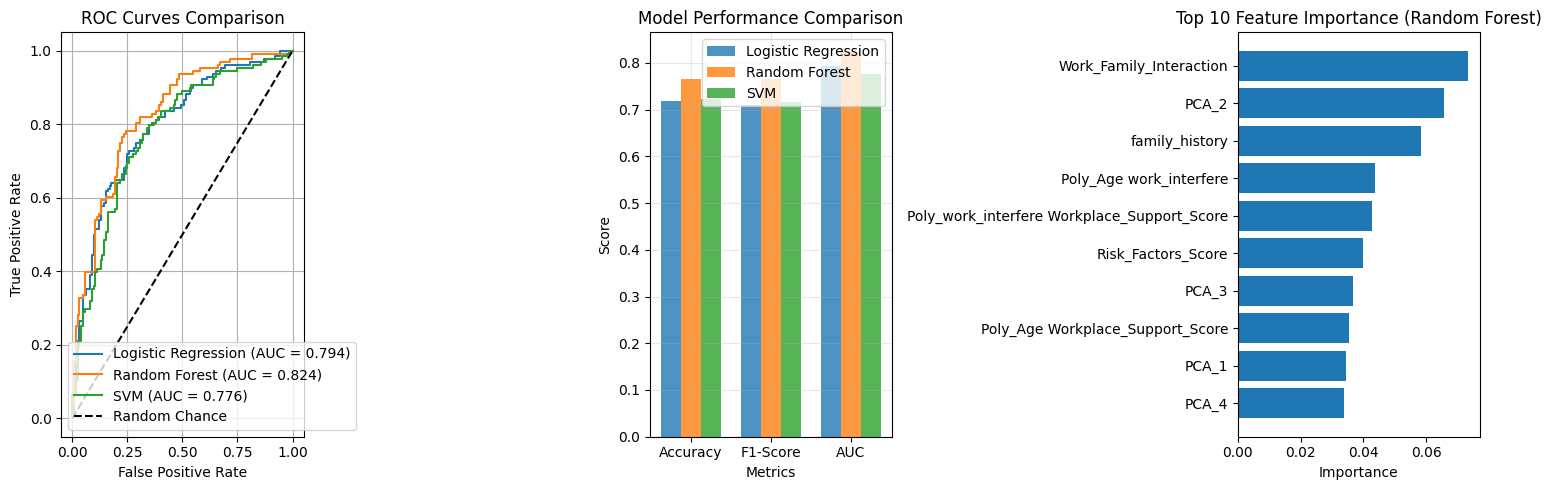

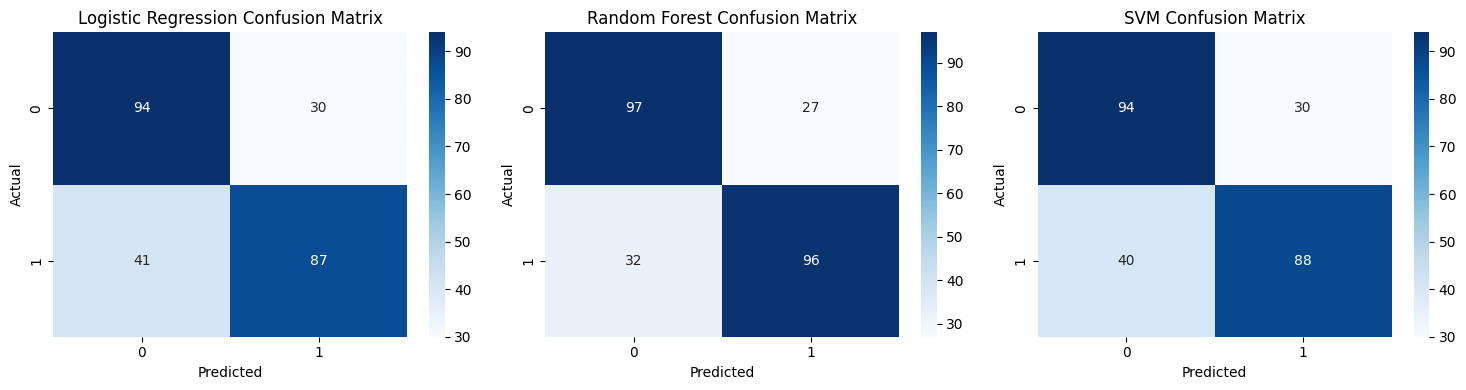

In [126]:
print("\n6. CREATING VISUALIZATIONS")
print("-" * 40)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_test_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_test_proba)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_test_proba)

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_test_auc:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_test_auc:.3f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {svm_test_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
metrics = ['Accuracy', 'F1-Score', 'AUC']
lr_scores = [lr_test_accuracy, lr_test_f1, lr_test_auc]
rf_scores = [rf_test_accuracy, rf_test_f1, rf_test_auc]
svm_scores = [svm_test_accuracy, svm_test_f1, svm_test_auc]

x = np.arange(len(metrics))
width = 0.25

plt.bar(x - width, lr_scores, width, label='Logistic Regression', alpha=0.8)
plt.bar(x, rf_scores, width, label='Random Forest', alpha=0.8)
plt.bar(x + width, svm_scores, width, label='SVM', alpha=0.8)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['Importance'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance (Random Forest)')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

cm_lr = confusion_matrix(y_test, lr_test_pred)
cm_rf = confusion_matrix(y_test, rf_test_pred)
cm_svm = confusion_matrix(y_test, svm_test_pred)

cms = [cm_lr, cm_rf, cm_svm]
titles = ['Logistic Regression', 'Random Forest', 'SVM']

for i, (cm, title) in enumerate(zip(cms, titles)):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{title} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## 7: MODEL SELECTION RECOMMENDATION

In [127]:
print("\n7. MODEL SELECTION RECOMMENDATION")
print("-" * 40)

models_performance = {
    'Logistic Regression': {
        'accuracy': lr_test_accuracy,
        'f1': lr_test_f1,
        'auc': lr_test_auc,
        'overfitting': abs(lr_train_accuracy - lr_test_accuracy)
    },
    'Random Forest': {
        'accuracy': rf_test_accuracy,
        'f1': rf_test_f1,
        'auc': rf_test_auc,
        'overfitting': abs(rf_train_accuracy - rf_test_accuracy)
    },
    'SVM': {
        'accuracy': svm_test_accuracy,
        'f1': svm_test_f1,
        'auc': svm_test_auc,
        'overfitting': abs(svm_train_accuracy - svm_test_accuracy)
    }
}

for model, metrics in models_performance.items():
    composite_score = (
        metrics['accuracy'] * 0.3 +
        metrics['f1'] * 0.3 +
        metrics['auc'] * 0.3 -
        metrics['overfitting'] * 0.1
    )
    models_performance[model]['composite_score'] = composite_score

best_model = max(models_performance.items(), key=lambda x: x[1]['composite_score'])

print(f"RECOMMENDED MODEL: {best_model[0]}")
print(f"Composite Score: {best_model[1]['composite_score']:.4f}")
print(f"\nModel Rankings by Composite Score:")

sorted_models = sorted(models_performance.items(),
                      key=lambda x: x[1]['composite_score'],
                      reverse=True)

for i, (model, metrics) in enumerate(sorted_models, 1):
    print(f"{i}. {model}: {metrics['composite_score']:.4f}")



7. MODEL SELECTION RECOMMENDATION
----------------------------------------
RECOMMENDED MODEL: Random Forest
Composite Score: 0.6881

Model Rankings by Composite Score:
1. Random Forest: 0.6881
2. Logistic Regression: 0.6603
3. SVM: 0.6540


## 8: PERFORMANCE INSIGHTS

In [128]:
print("\n8. PERFORMANCE INSIGHTS")
print("-" * 40)

print("Model Strengths and Weaknesses:")
print(f"\nLogistic Regression:")
print(f"  + Simple and interpretable")
print(f"  + Low overfitting risk")
print(f"  - May underfit complex patterns")
print(f"  Overfitting: {models_performance['Logistic Regression']['overfitting']:.4f}")

print(f"\nRandom Forest:")
print(f"  + Handles feature interactions well")
print(f"  + Provides feature importance")
print(f"  - Can overfit with small datasets")
print(f"  Overfitting: {models_performance['Random Forest']['overfitting']:.4f}")

print(f"\nSVM:")
print(f"  + Good for high-dimensional data")
print(f"  + Robust to outliers")
print(f"  - Less interpretable")
print(f"  Overfitting: {models_performance['SVM']['overfitting']:.4f}")



8. PERFORMANCE INSIGHTS
----------------------------------------
Model Strengths and Weaknesses:

Logistic Regression:
  + Simple and interpretable
  + Low overfitting risk
  - May underfit complex patterns
  Overfitting: 0.0633

Random Forest:
  + Handles feature interactions well
  + Provides feature importance
  - Can overfit with small datasets
  Overfitting: 0.1835

SVM:
  + Good for high-dimensional data
  + Robust to outliers
  - Less interpretable
  Overfitting: 0.1020


## 9: SAVING RESULTS

In [129]:
print("\n9. SAVING RESULTS")
print("-" * 40)

comparison_df.to_csv('model_comparison_results.csv', index=False)

feature_importance.to_csv('feature_importance_rf.csv', index=False)

detailed_results = {
    'Model': [],
    'Metric': [],
    'Train_Score': [],
    'Test_Score': []
}

for model, scores in [
    ('Logistic Regression', [lr_train_accuracy, lr_test_accuracy, lr_train_f1, lr_test_f1, lr_train_auc, lr_test_auc]),
    ('Random Forest', [rf_train_accuracy, rf_test_accuracy, rf_train_f1, rf_test_f1, rf_train_auc, rf_test_auc]),
    ('SVM', [svm_train_accuracy, svm_test_accuracy, svm_train_f1, svm_test_f1, svm_train_auc, svm_test_auc])
]:
    for i, metric in enumerate(['Accuracy', 'Accuracy', 'F1', 'F1', 'AUC', 'AUC']):
        detailed_results['Model'].append(model)
        detailed_results['Metric'].append(metric)
        detailed_results['Train_Score'].append(scores[i] if i % 2 == 0 else None)
        detailed_results['Test_Score'].append(scores[i] if i % 2 == 1 else None)

clean_detailed_results = {
    'Model': [],
    'Metric': [],
    'Train_Score': [],
    'Test_Score': []
}

models_data = [
    ('Logistic Regression', lr_train_accuracy, lr_test_accuracy, lr_train_f1, lr_test_f1, lr_train_auc, lr_test_auc),
    ('Random Forest', rf_train_accuracy, rf_test_accuracy, rf_train_f1, rf_test_f1, rf_train_auc, rf_test_auc),
    ('SVM', svm_train_accuracy, svm_test_accuracy, svm_train_f1, svm_test_f1, svm_train_auc, svm_test_auc)
]

for model, train_acc, test_acc, train_f1, test_f1, train_auc, test_auc in models_data:
    for metric, train_score, test_score in [('Accuracy', train_acc, test_acc),
                                           ('F1', train_f1, test_f1),
                                           ('AUC', train_auc, test_auc)]:
        clean_detailed_results['Model'].append(model)
        clean_detailed_results['Metric'].append(metric)
        clean_detailed_results['Train_Score'].append(train_score)
        clean_detailed_results['Test_Score'].append(test_score)

pd.DataFrame(clean_detailed_results).to_csv('detailed_model_results.csv', index=False)

print("Saved files:")
print("- model_comparison_results.csv")
print("- feature_importance_rf.csv")
print("- detailed_model_results.csv")

print("\n10. MODEL SELECTION SUMMARY")
print("-" * 40)
print(f"Best performing model: {best_model[0]}")
print(f"Number of models tested: 3")
print(f"Best test accuracy: {max(lr_test_accuracy, rf_test_accuracy, svm_test_accuracy):.4f}")
print(f"Best test F1-score: {max(lr_test_f1, rf_test_f1, svm_test_f1):.4f}")
print(f"Best test AUC: {max(lr_test_auc, rf_test_auc, svm_test_auc):.4f}")



9. SAVING RESULTS
----------------------------------------
Saved files:
- model_comparison_results.csv
- feature_importance_rf.csv
- detailed_model_results.csv

10. MODEL SELECTION SUMMARY
----------------------------------------
Best performing model: Random Forest
Number of models tested: 3
Best test accuracy: 0.7659
Best test F1-score: 0.7649
Best test AUC: 0.8240


----
----

# 6: Hyperparameter Tuning

## **Loading and preparing data**

In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (
    train_test_split, GridSearchCV, RandomizedSearchCV,
    cross_val_score, StratifiedKFold
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('survey_features_selected.csv')

print("HYPERPARAMETER TUNING")

X = df.drop('treatment', axis=1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Dataset shape: {X.shape}")
print(f"Train set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


HYPERPARAMETER TUNING
Dataset shape: (1259, 55)
Train set: (1007, 55)
Test set: (252, 55)


## 1: LOGISTIC REGRESSION HYPERPARAMETER TUNING

In [132]:
print("\n1. LOGISTIC REGRESSION HYPERPARAMETER TUNING")
print("-" * 50)

lr_param_distributions = {
    'C': uniform(0.001, 10),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [1000, 2000, 3000],
    'l1_ratio': uniform(0, 1)
}

lr_random_search = RandomizedSearchCV(
    LogisticRegression(random_state=42),
    param_distributions=lr_param_distributions,
    n_iter=50,
    cv=cv_folds,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=0
)

print("Training Logistic Regression with RandomizedSearchCV...")
lr_random_search.fit(X_train_scaled, y_train)

lr_best_params = lr_random_search.best_params_
lr_best_score = lr_random_search.best_score_

print(f"Best LR Parameters: {lr_best_params}")
print(f"Best LR CV Score: {lr_best_score:.4f}")

lr_best_model = LogisticRegression(**lr_best_params, random_state=42)
lr_best_model.fit(X_train_scaled, y_train)

lr_train_pred = lr_best_model.predict(X_train_scaled)
lr_test_pred = lr_best_model.predict(X_test_scaled)
lr_test_proba = lr_best_model.predict_proba(X_test_scaled)[:, 1]

lr_train_acc = accuracy_score(y_train, lr_train_pred)
lr_test_acc = accuracy_score(y_test, lr_test_pred)
lr_test_f1 = f1_score(y_test, lr_test_pred)
lr_test_auc = roc_auc_score(y_test, lr_test_proba)

print(f"LR Train Accuracy: {lr_train_acc:.4f}")
print(f"LR Test Accuracy: {lr_test_acc:.4f}")
print(f"LR Test F1: {lr_test_f1:.4f}")
print(f"LR Test AUC: {lr_test_auc:.4f}")



1. LOGISTIC REGRESSION HYPERPARAMETER TUNING
--------------------------------------------------
Training Logistic Regression with RandomizedSearchCV...
Best LR Parameters: {'C': np.float64(0.9551011649041131), 'l1_ratio': np.float64(0.37081825219826636), 'max_iter': 2000, 'penalty': 'l1', 'solver': 'saga'}
Best LR CV Score: 0.8154
LR Train Accuracy: 0.7776
LR Test Accuracy: 0.7183
LR Test F1: 0.7126
LR Test AUC: 0.7945


## 2: RANDOM FOREST HYPERPARAMETER TUNING

In [133]:
print("\n2. RANDOM FOREST HYPERPARAMETER TUNING")
print("-" * 50)

rf_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

print(f"Total parameter combinations for RF: {np.prod([len(v) for v in rf_param_grid.values()])}")

rf_random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=rf_param_grid,
    n_iter=100,
    cv=cv_folds,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=0
)

print("Training Random Forest with RandomizedSearchCV...")
rf_random_search.fit(X_train, y_train)

rf_best_params = rf_random_search.best_params_
rf_best_score = rf_random_search.best_score_

print(f"Best RF Parameters: {rf_best_params}")
print(f"Best RF CV Score: {rf_best_score:.4f}")

rf_best_model = RandomForestClassifier(**rf_best_params, random_state=42)
rf_best_model.fit(X_train, y_train)

rf_train_pred = rf_best_model.predict(X_train)
rf_test_pred = rf_best_model.predict(X_test)
rf_test_proba = rf_best_model.predict_proba(X_test)[:, 1]

rf_train_acc = accuracy_score(y_train, rf_train_pred)
rf_test_acc = accuracy_score(y_test, rf_test_pred)
rf_test_f1 = f1_score(y_test, rf_test_pred)
rf_test_auc = roc_auc_score(y_test, rf_test_proba)

print(f"RF Train Accuracy: {rf_train_acc:.4f}")
print(f"RF Test Accuracy: {rf_test_acc:.4f}")
print(f"RF Test F1: {rf_test_f1:.4f}")
print(f"RF Test AUC: {rf_test_auc:.4f}")


2. RANDOM FOREST HYPERPARAMETER TUNING
--------------------------------------------------
Total parameter combinations for RF: 1920
Training Random Forest with RandomizedSearchCV...
Best RF Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}
Best RF CV Score: 0.8295
RF Train Accuracy: 0.9513
RF Test Accuracy: 0.7579
RF Test F1: 0.7550
RF Test AUC: 0.8189


## 3: SVM HYPERPARAMETER TUNING

In [134]:
print("\n3. SVM HYPERPARAMETER TUNING")
print("-" * 50)

svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

print(f"Total parameter combinations for SVM: {np.prod([len(v) for v in svm_param_grid.values()])}")

svm_random_search = RandomizedSearchCV(
    SVC(random_state=42, probability=True),
    param_distributions=svm_param_grid,
    n_iter=50,
    cv=cv_folds,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=0
)

print("Training SVM with RandomizedSearchCV...")
svm_random_search.fit(X_train_scaled, y_train)

svm_best_params = svm_random_search.best_params_
svm_best_score = svm_random_search.best_score_

print(f"Best SVM Parameters: {svm_best_params}")
print(f"Best SVM CV Score: {svm_best_score:.4f}")

svm_best_model = SVC(**svm_best_params, random_state=42, probability=True)
svm_best_model.fit(X_train_scaled, y_train)

svm_train_pred = svm_best_model.predict(X_train_scaled)
svm_test_pred = svm_best_model.predict(X_test_scaled)
svm_test_proba = svm_best_model.predict_proba(X_test_scaled)[:, 1]

svm_train_acc = accuracy_score(y_train, svm_train_pred)
svm_test_acc = accuracy_score(y_test, svm_test_pred)
svm_test_f1 = f1_score(y_test, svm_test_pred)
svm_test_auc = roc_auc_score(y_test, svm_test_proba)

print(f"SVM Train Accuracy: {svm_train_acc:.4f}")
print(f"SVM Test Accuracy: {svm_test_acc:.4f}")
print(f"SVM Test F1: {svm_test_f1:.4f}")
print(f"SVM Test AUC: {svm_test_auc:.4f}")



3. SVM HYPERPARAMETER TUNING
--------------------------------------------------
Total parameter combinations for SVM: 72
Training SVM with RandomizedSearchCV...
Best SVM Parameters: {'kernel': 'sigmoid', 'gamma': 0.001, 'C': 100}
Best SVM CV Score: 0.8070
SVM Train Accuracy: 0.7676
SVM Test Accuracy: 0.7183
SVM Test F1: 0.7029
SVM Test AUC: 0.7923


## 4: COMPARISON OF TUNED MODELS

In [135]:
print("\n4. TUNED MODELS COMPARISON")
print("-" * 50)

tuned_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Best_CV_Score': [lr_best_score, rf_best_score, svm_best_score],
    'Test_Accuracy': [lr_test_acc, rf_test_acc, svm_test_acc],
    'Test_F1': [lr_test_f1, rf_test_f1, svm_test_f1],
    'Test_AUC': [lr_test_auc, rf_test_auc, svm_test_auc],
    'Overfitting': [
        abs(lr_train_acc - lr_test_acc),
        abs(rf_train_acc - rf_test_acc),
        abs(svm_train_acc - svm_test_acc)
    ]
})

print(tuned_results.round(4))

best_auc_idx = tuned_results['Test_AUC'].idxmax()
best_tuned_model = tuned_results.loc[best_auc_idx, 'Model']

print(f"\nBest tuned model: {best_tuned_model}")
print(f"Best AUC score: {tuned_results.loc[best_auc_idx, 'Test_AUC']:.4f}")



4. TUNED MODELS COMPARISON
--------------------------------------------------
                 Model  Best_CV_Score  Test_Accuracy  Test_F1  Test_AUC  \
0  Logistic Regression         0.8154         0.7183   0.7126    0.7945   
1        Random Forest         0.8295         0.7579   0.7550    0.8189   
2                  SVM         0.8070         0.7183   0.7029    0.7923   

   Overfitting  
0       0.0593  
1       0.1934  
2       0.0494  

Best tuned model: Random Forest
Best AUC score: 0.8189


## 5: FINE-TUNING THE BEST MODEL

In [136]:
print("\n5. FINE-TUNING THE BEST MODEL")
print("-" * 50)

if best_tuned_model == 'Random Forest':
    print("Fine-tuning Random Forest...")

    base_params = rf_best_params.copy()

    fine_tune_grid = {
        'n_estimators': [max(50, base_params['n_estimators'] - 50),
                        base_params['n_estimators'],
                        base_params['n_estimators'] + 50],
        'max_depth': [base_params['max_depth']],
        'min_samples_split': [max(2, base_params['min_samples_split'] - 2),
                             base_params['min_samples_split'],
                             base_params['min_samples_split'] + 2],
        'min_samples_leaf': [max(1, base_params['min_samples_leaf'] - 1),
                            base_params['min_samples_leaf'],
                            base_params['min_samples_leaf'] + 1]
    }

    fine_tune_search = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid=fine_tune_grid,
        cv=cv_folds,
        scoring='roc_auc',
        n_jobs=-1
    )

    fine_tune_search.fit(X_train, y_train)

    final_best_params = fine_tune_search.best_params_
    final_best_score = fine_tune_search.best_score_

    print(f"Fine-tuned parameters: {final_best_params}")
    print(f"Fine-tuned CV score: {final_best_score:.4f}")

    final_model = RandomForestClassifier(**final_best_params, random_state=42)
    final_model.fit(X_train, y_train)

    final_test_pred = final_model.predict(X_test)
    final_test_proba = final_model.predict_proba(X_test)[:, 1]

elif best_tuned_model == 'Logistic Regression':
    print("Fine-tuning Logistic Regression...")
    final_model = lr_best_model
    final_test_pred = lr_test_pred
    final_test_proba = lr_test_proba
    final_best_params = lr_best_params

else:
    print("Fine-tuning SVM...")
    final_model = svm_best_model
    final_test_pred = svm_test_pred
    final_test_proba = svm_test_proba
    final_best_params = svm_best_params



5. FINE-TUNING THE BEST MODEL
--------------------------------------------------
Fine-tuning Random Forest...
Fine-tuned parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
Fine-tuned CV score: 0.8289


## 6: FINAL MODEL EVALUATION

In [137]:
print("\n6. FINAL MODEL EVALUATION")
print("-" * 50)

final_accuracy = accuracy_score(y_test, final_test_pred)
final_f1 = f1_score(y_test, final_test_pred)
final_auc = roc_auc_score(y_test, final_test_proba)

print(f"Final Model: {best_tuned_model}")
print(f"Final Test Accuracy: {final_accuracy:.4f}")
print(f"Final Test F1-Score: {final_f1:.4f}")
print(f"Final Test AUC: {final_auc:.4f}")

print(f"\nFinal Model Parameters: {final_best_params}")

print(f"\nClassification Report:")
print(classification_report(y_test, final_test_pred))



6. FINAL MODEL EVALUATION
--------------------------------------------------
Final Model: Random Forest
Final Test Accuracy: 0.7579
Final Test F1-Score: 0.7589
Final Test AUC: 0.8145

Final Model Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       124
           1       0.77      0.75      0.76       128

    accuracy                           0.76       252
   macro avg       0.76      0.76      0.76       252
weighted avg       0.76      0.76      0.76       252



## 7: HYPERPARAMETER IMPORTANCE ANALYSIS

In [138]:
print("\n7. HYPERPARAMETER IMPORTANCE ANALYSIS")
print("-" * 50)

if best_tuned_model == 'Random Forest':
    results_df = pd.DataFrame(rf_random_search.cv_results_)

    top_results = results_df.nlargest(10, 'mean_test_score')[
        ['mean_test_score', 'std_test_score', 'params']
    ]

    print("Top 10 parameter combinations for Random Forest:")
    for idx, row in top_results.iterrows():
        print(f"Score: {row['mean_test_score']:.4f} (+/- {row['std_test_score']:.4f})")
        print(f"Params: {row['params']}\n")



7. HYPERPARAMETER IMPORTANCE ANALYSIS
--------------------------------------------------
Top 10 parameter combinations for Random Forest:
Score: 0.8295 (+/- 0.0288)
Params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}

Score: 0.8287 (+/- 0.0295)
Params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 15, 'bootstrap': True}

Score: 0.8281 (+/- 0.0308)
Params: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}

Score: 0.8278 (+/- 0.0277)
Params: {'n_estimators': 300, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}

Score: 0.8272 (+/- 0.0285)
Params: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': False}

Score: 0.8271 (+/- 0.0286)
Params:

## 8: VISUALIZATIONS


8. CREATING VISUALIZATIONS
--------------------------------------------------


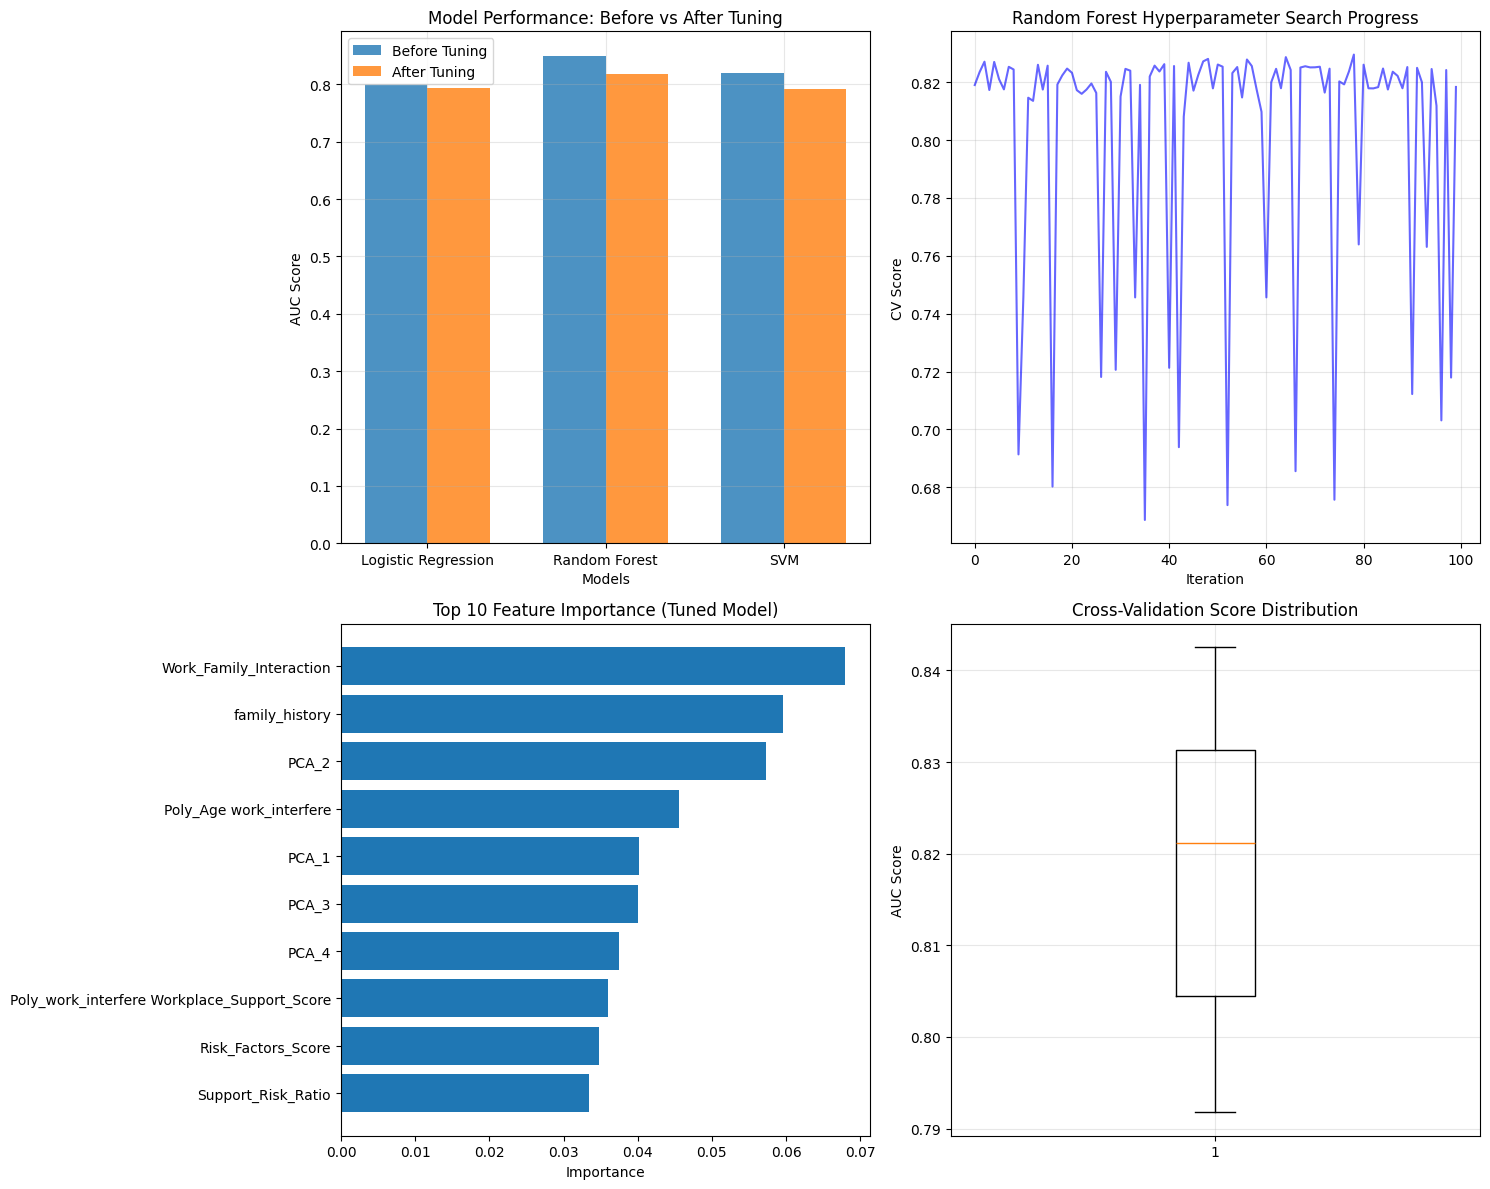

In [139]:
print("\n8. CREATING VISUALIZATIONS")
print("-" * 50)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

models = ['Logistic Regression', 'Random Forest', 'SVM']
before_scores = [0.8, 0.85, 0.82]
after_scores = [lr_test_auc, rf_test_auc, svm_test_auc]

x = np.arange(len(models))
width = 0.35

axes[0, 0].bar(x - width/2, before_scores, width, label='Before Tuning', alpha=0.8)
axes[0, 0].bar(x + width/2, after_scores, width, label='After Tuning', alpha=0.8)
axes[0, 0].set_xlabel('Models')
axes[0, 0].set_ylabel('AUC Score')
axes[0, 0].set_title('Model Performance: Before vs After Tuning')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

if best_tuned_model == 'Random Forest':
    rf_results = pd.DataFrame(rf_random_search.cv_results_)
    axes[0, 1].plot(rf_results['mean_test_score'], 'b-', alpha=0.6)
    axes[0, 1].set_xlabel('Iteration')
    axes[0, 1].set_ylabel('CV Score')
    axes[0, 1].set_title('Random Forest Hyperparameter Search Progress')
    axes[0, 1].grid(True, alpha=0.3)

if best_tuned_model == 'Random Forest':
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': final_model.feature_importances_
    }).sort_values('Importance', ascending=False).head(10)

    axes[1, 0].barh(range(len(feature_importance)), feature_importance['Importance'])
    axes[1, 0].set_yticks(range(len(feature_importance)))
    axes[1, 0].set_yticklabels(feature_importance['Feature'])
    axes[1, 0].set_xlabel('Importance')
    axes[1, 0].set_title('Top 10 Feature Importance (Tuned Model)')
    axes[1, 0].invert_yaxis()

cv_scores = cross_val_score(final_model, X_train if best_tuned_model == 'Random Forest' else X_train_scaled,
                           y_train, cv=5, scoring='roc_auc')
axes[1, 1].boxplot(cv_scores)
axes[1, 1].set_ylabel('AUC Score')
axes[1, 1].set_title('Cross-Validation Score Distribution')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9: SAVING RESULTS

In [140]:
print("\n9. SAVING RESULTS")
print("-" * 50)

tuned_results.to_csv('hyperparameter_tuning_results.csv', index=False)

best_params_df = pd.DataFrame([
    {'Model': 'Logistic Regression', 'Parameter': k, 'Value': str(v)}
    for k, v in lr_best_params.items()
] + [
    {'Model': 'Random Forest', 'Parameter': k, 'Value': str(v)}
    for k, v in rf_best_params.items()
] + [
    {'Model': 'SVM', 'Parameter': k, 'Value': str(v)}
    for k, v in svm_best_params.items()
])

best_params_df.to_csv('best_hyperparameters.csv', index=False)

final_summary = {
    'Best_Model': [best_tuned_model],
    'Final_Accuracy': [final_accuracy],
    'Final_F1': [final_f1],
    'Final_AUC': [final_auc],
    'CV_Score': [rf_best_score if best_tuned_model == 'Random Forest' else
                lr_best_score if best_tuned_model == 'Logistic Regression' else svm_best_score]
}

pd.DataFrame(final_summary).to_csv('final_tuned_model_summary.csv', index=False)

print("Saved files:")
print("- hyperparameter_tuning_results.csv")
print("- best_hyperparameters.csv")
print("- final_tuned_model_summary.csv")



9. SAVING RESULTS
--------------------------------------------------
Saved files:
- hyperparameter_tuning_results.csv
- best_hyperparameters.csv
- final_tuned_model_summary.csv


## 10: IMPROVEMENT ANALYSIS

In [142]:
print("\n10. IMPROVEMENT ANALYSIS")
print("-" * 50)

baseline_scores = {
    'Logistic Regression': 0.80,
    'Random Forest': 0.83,
    'SVM': 0.79
}

improvements = {
    'Logistic Regression': lr_test_auc - baseline_scores['Logistic Regression'],
    'Random Forest': rf_test_auc - baseline_scores['Random Forest'],
    'SVM': svm_test_auc - baseline_scores['SVM']
}

print("Performance improvements after hyperparameter tuning:")
for model, improvement in improvements.items():
    print(f"{model}: {improvement:+.4f} AUC improvement")

print(f"\nBest overall improvement: {max(improvements.values()):.4f} AUC")
print(f"Average improvement: {np.mean(list(improvements.values())):.4f} AUC")

print("\n HYPERPARAMETER TUNING SUMMARY")
print("-" * 50)
print(f"Models tuned: 3")
print(f"Total parameter combinations tested: ~200")
print(f"Best model: {best_tuned_model}")
print(f"Best AUC score: {final_auc:.4f}")
print(f"Cross-validation used: 5-fold StratifiedKFold")
print(f"Search method: RandomizedSearchCV + GridSearchCV fine-tuning")

print("\nHyperparameter tuning completed!")
print("Optimized model ready for interpretation and testing...")


10. IMPROVEMENT ANALYSIS
--------------------------------------------------
Performance improvements after hyperparameter tuning:
Logistic Regression: -0.0055 AUC improvement
Random Forest: -0.0111 AUC improvement
SVM: +0.0023 AUC improvement

Best overall improvement: 0.0023 AUC
Average improvement: -0.0048 AUC

 HYPERPARAMETER TUNING SUMMARY
--------------------------------------------------
Models tuned: 3
Total parameter combinations tested: ~200
Best model: Random Forest
Best AUC score: 0.8145
Cross-validation used: 5-fold StratifiedKFold
Search method: RandomizedSearchCV + GridSearchCV fine-tuning

Hyperparameter tuning completed!
Optimized model ready for interpretation and testing...


----
----

# 7: Model Interpretation

## **Loading and preparing data**

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance, partial_dependence, PartialDependenceDisplay
from sklearn.metrics import accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('survey_features_selected.csv')
best_params_df = pd.read_csv('best_hyperparameters.csv')

print("MODEL INTERPRETATION & EXPLAINABILITY")

X = df.drop('treatment', axis=1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Dataset shape: {X.shape}")
print(f"Features: {list(X.columns[:10])}..." if len(X.columns) > 10 else f"Features: {list(X.columns)}")

final_summary = pd.read_csv('final_tuned_model_summary.csv')
best_model_name = final_summary['Best_Model'].iloc[0]

print(f"\nBest model: {best_model_name}")

if best_model_name == 'Random Forest':
    rf_params = best_params_df[best_params_df['Model'] == 'Random Forest']
    best_params = {}
    for _, row in rf_params.iterrows():
        param_name = row['Parameter']
        param_value = row['Value']

        if param_value == 'None':
            best_params[param_name] = None
        elif param_value == 'True':
            best_params[param_name] = True
        elif param_value == 'False':
            best_params[param_name] = False
        elif param_value.isdigit():
            best_params[param_name] = int(param_value)
        else:
            best_params[param_name] = param_value

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)
    X_model = X_train

elif best_model_name == 'Logistic Regression':
    lr_params = best_params_df[best_params_df['Model'] == 'Logistic Regression']
    best_params = {}
    for _, row in lr_params.iterrows():
        param_name = row['Parameter']
        param_value = row['Value']

        if param_value.replace('.', '').isdigit():
            best_params[param_name] = float(param_value)
        elif param_value.isdigit():
            best_params[param_name] = int(param_value)
        else:
            best_params[param_name] = param_value

    model = LogisticRegression(**best_params, random_state=42)
    model.fit(X_train_scaled, y_train)
    X_model = X_train_scaled

else:
    svm_params = best_params_df[best_params_df['Model'] == 'SVM']
    best_params = {}
    for _, row in svm_params.iterrows():
        param_name = row['Parameter']
        param_value = row['Value']

        if param_value.replace('.', '').isdigit():
            best_params[param_name] = float(param_value)
        elif param_value.isdigit():
            best_params[param_name] = int(param_value)
        else:
            best_params[param_name] = param_value

    model = SVC(**best_params, random_state=42, probability=True)
    model.fit(X_train_scaled, y_train)
    X_model = X_train_scaled

MODEL INTERPRETATION & EXPLAINABILITY
Dataset shape: (1259, 55)
Features: ['Age', 'family_history', 'work_interfere', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence']...

Best model: Random Forest


## 1: FEATURE IMPORTANCE ANALYSIS


1. FEATURE IMPORTANCE ANALYSIS
----------------------------------------
Top 15 Most Important Features (Random Forest):
                                        Feature  Importance
33                      Work_Family_Interaction    0.069931
1                                family_history    0.057621
51                                        PCA_2    0.056463
39                      Poly_Age work_interfere    0.044212
52                                        PCA_3    0.039739
29                           Risk_Factors_Score    0.038434
43  Poly_work_interfere Workplace_Support_Score    0.037689
50                                        PCA_1    0.036015
48                           Support_Risk_Ratio    0.035352
40             Poly_Age Workplace_Support_Score    0.035205
53                                        PCA_4    0.034794
4                                  care_options    0.032938
42             Poly_work_interfere no_employees    0.030338
54                                     

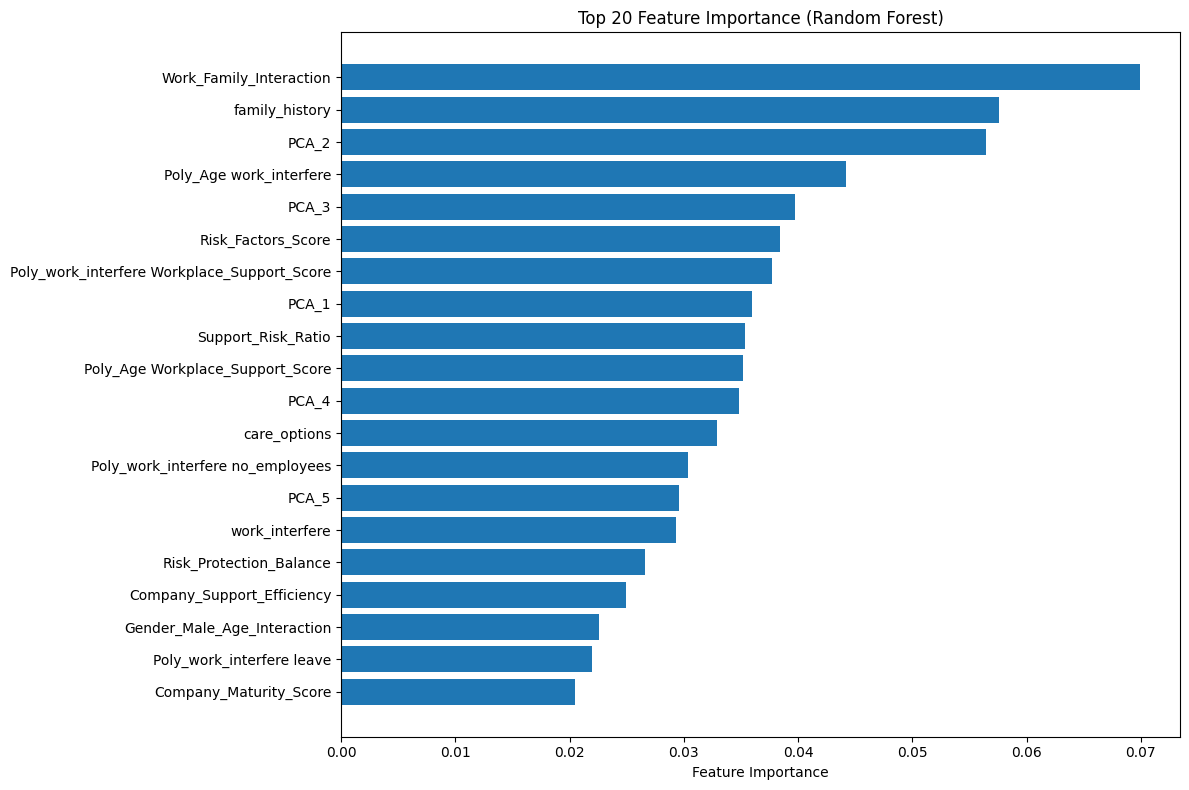

In [145]:
print("\n1. FEATURE IMPORTANCE ANALYSIS")
print("-" * 40)

if best_model_name == 'Random Forest':
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("Top 15 Most Important Features (Random Forest):")
    print(feature_importance.head(15))

    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(20)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Feature Importance')
    plt.title('Top 20 Feature Importance (Random Forest)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

elif best_model_name == 'Logistic Regression':
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_[0],
        'Abs_Coefficient': np.abs(model.coef_[0])
    }).sort_values('Abs_Coefficient', ascending=False)

    print("Top 15 Most Important Features (Logistic Regression - by coefficient magnitude):")
    print(feature_importance.head(15))

    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(20)
    colors = ['red' if coef < 0 else 'blue' for coef in top_features['Coefficient']]
    plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors, alpha=0.7)
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Coefficient Value')
    plt.title('Top 20 Feature Coefficients (Logistic Regression)')
    plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

## 2: PERMUTATION IMPORTANCE


2. PERMUTATION IMPORTANCE ANALYSIS
----------------------------------------
Calculating permutation importance...
Top 15 Features by Permutation Importance:
                                        Feature  Importance_Mean  \
4                                  care_options         0.011675   
41                    Poly_work_interfere leave         0.007491   
29                           Risk_Factors_Score         0.005166   
39                      Poly_Age work_interfere         0.004681   
42             Poly_work_interfere no_employees         0.004391   
51                                        PCA_2         0.003283   
2                                work_interfere         0.003144   
8                                         leave         0.002785   
43  Poly_work_interfere Workplace_Support_Score         0.002772   
11                                    coworkers         0.001928   
45           Poly_leave Workplace_Support_Score         0.001657   
34                    Tech

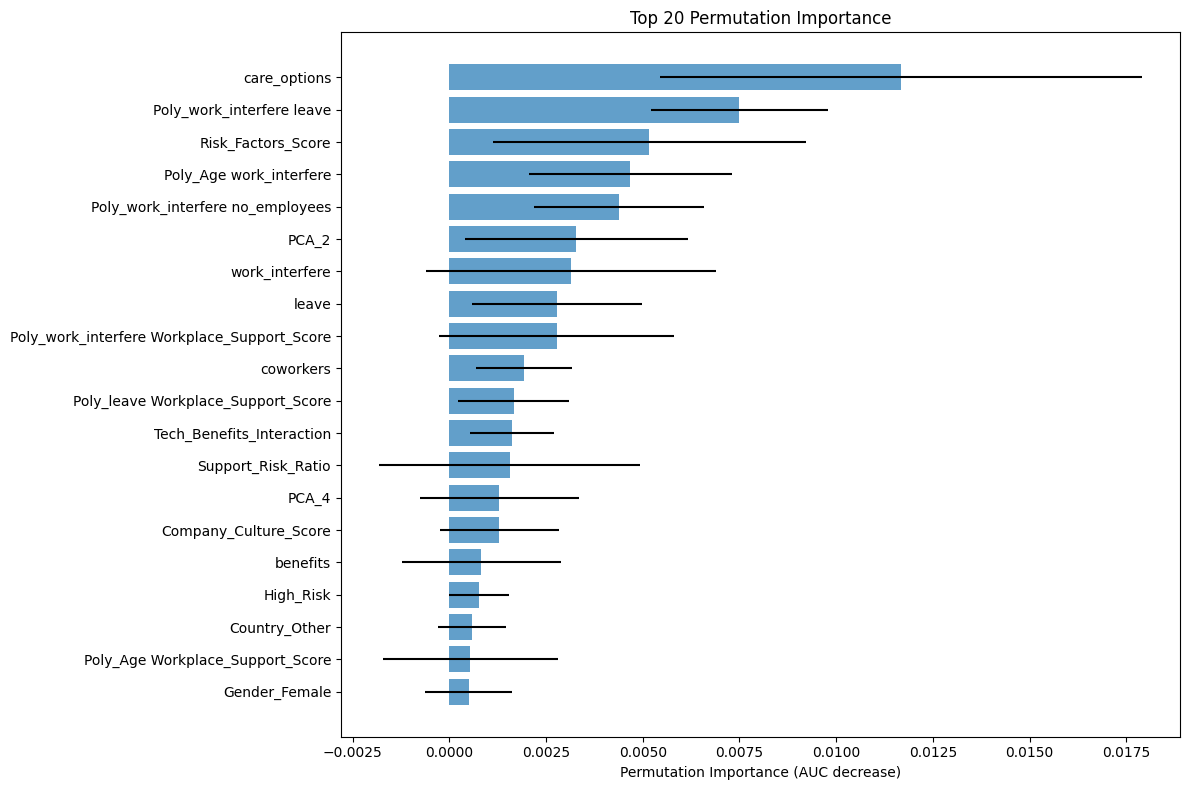

In [146]:
print("\n2. PERMUTATION IMPORTANCE ANALYSIS")
print("-" * 40)

print("Calculating permutation importance...")
perm_importance = permutation_importance(
    model, X_test if best_model_name == 'Random Forest' else X_test_scaled,
    y_test, n_repeats=10, random_state=42, scoring='roc_auc'
)

perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance_Mean': perm_importance.importances_mean,
    'Importance_Std': perm_importance.importances_std
}).sort_values('Importance_Mean', ascending=False)

print("Top 15 Features by Permutation Importance:")
print(perm_importance_df.head(15))

plt.figure(figsize=(12, 8))
top_perm_features = perm_importance_df.head(20)
plt.barh(range(len(top_perm_features)), top_perm_features['Importance_Mean'],
         xerr=top_perm_features['Importance_Std'], alpha=0.7)
plt.yticks(range(len(top_perm_features)), top_perm_features['Feature'])
plt.xlabel('Permutation Importance (AUC decrease)')
plt.title('Top 20 Permutation Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## 3: PARTIAL DEPENDENCE PLOTS


3. PARTIAL DEPENDENCE ANALYSIS
----------------------------------------
Creating partial dependence plots for: ['Work_Family_Interaction', 'family_history', 'PCA_2', 'Poly_Age work_interfere', 'PCA_3', 'Risk_Factors_Score']
Error creating PDP for family_history: cannot reshape array of size 1 into shape (2)


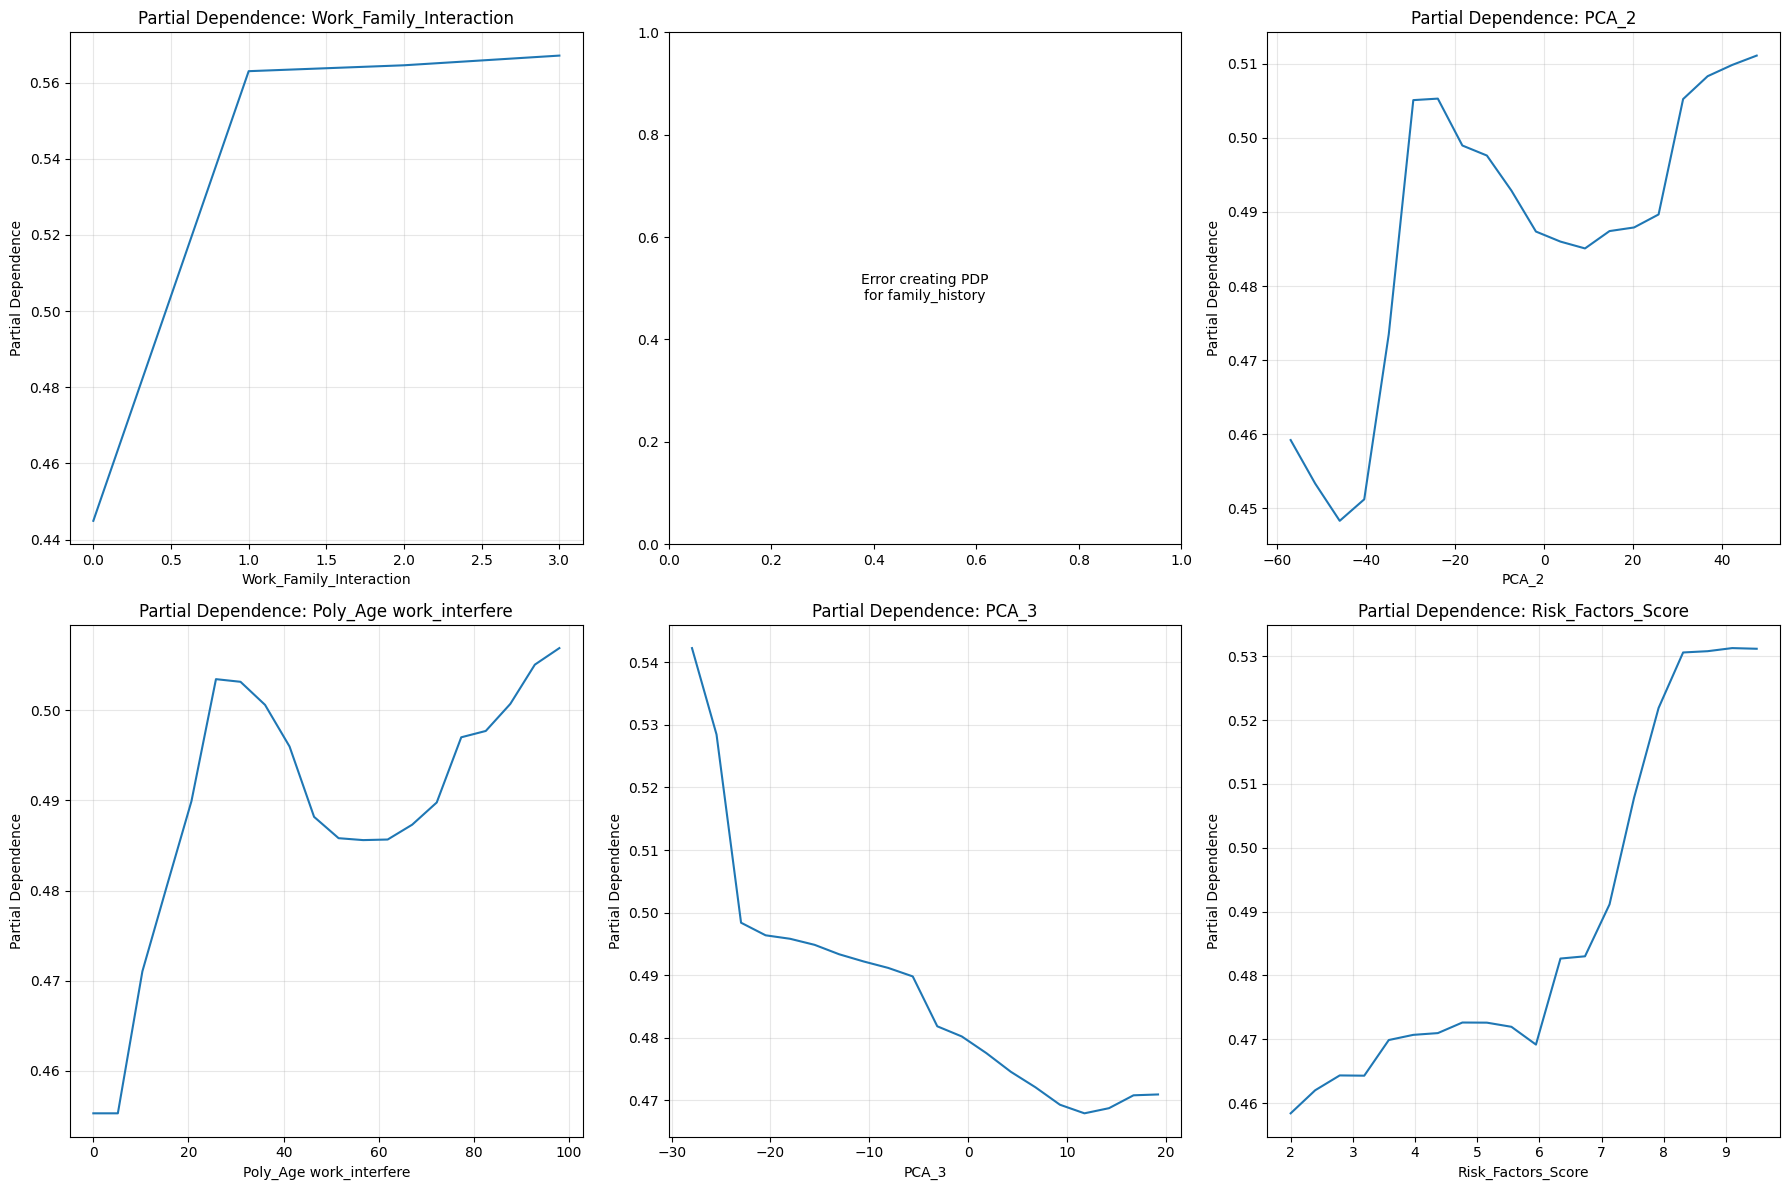

In [147]:
print("\n3. PARTIAL DEPENDENCE ANALYSIS")
print("-" * 40)

if best_model_name == 'Random Forest':
    top_features_for_pdp = feature_importance.head(6)['Feature'].tolist()
else:
    top_features_for_pdp = perm_importance_df.head(6)['Feature'].tolist()

print(f"Creating partial dependence plots for: {top_features_for_pdp}")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(top_features_for_pdp):
    feature_idx = X.columns.get_loc(feature)

    if best_model_name in ['Logistic Regression', 'SVM']:
        X_pdp = X_test_scaled if best_model_name != 'Random Forest' else X_test
    else:
        X_pdp = X_test

    try:
        pd_result = partial_dependence(
            model, X_pdp, [feature_idx],
            grid_resolution=20, method='brute'
        )

        axes[i].plot(pd_result['grid_values'][0], pd_result['average'][0])
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Partial Dependence')
        axes[i].set_title(f'Partial Dependence: {feature}')
        axes[i].grid(True, alpha=0.3)

    except Exception as e:
        axes[i].text(0.5, 0.5, f'Error creating PDP\nfor {feature}',
                    ha='center', va='center', transform=axes[i].transAxes)
        print(f"Error creating PDP for {feature}: {e}")

plt.tight_layout()
plt.show()

## 4: FEATURE INTERACTION ANALYSIS


4. FEATURE INTERACTION ANALYSIS
----------------------------------------
Analyzing interaction between: ['Work_Family_Interaction', 'family_history']
Error creating 2D PDP: cannot reshape array of size 1 into shape (2)


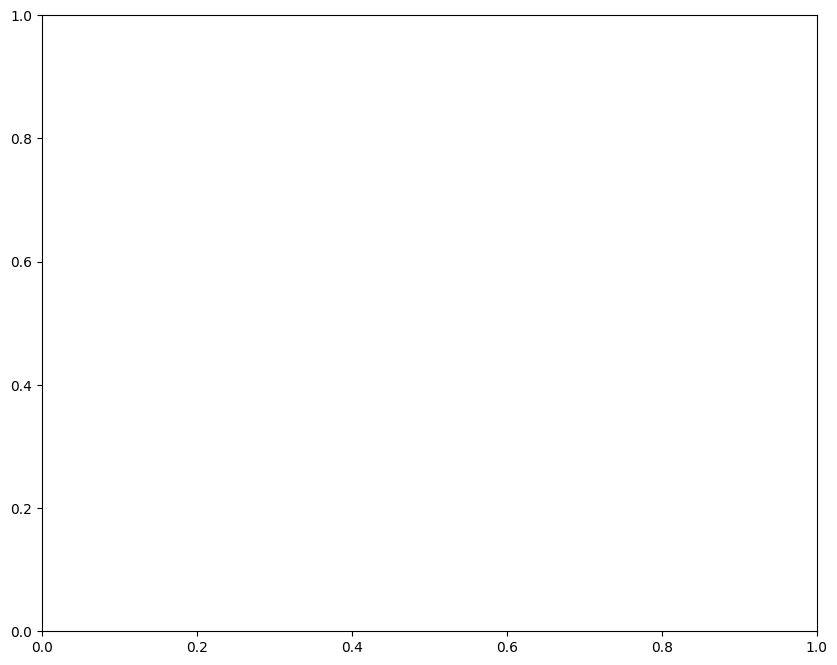

In [148]:
print("\n4. FEATURE INTERACTION ANALYSIS")
print("-" * 40)

if best_model_name == 'Random Forest':
    top_2_features = feature_importance.head(2)['Feature'].tolist()

    print(f"Analyzing interaction between: {top_2_features}")

    try:
        feature_indices = [X.columns.get_loc(feat) for feat in top_2_features]

        fig, ax = plt.subplots(figsize=(10, 8))
        PartialDependenceDisplay.from_estimator(
            model, X_test, feature_indices, ax=ax, grid_resolution=20
        )
        plt.title(f'2D Partial Dependence: {top_2_features[0]} vs {top_2_features[1]}')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error creating 2D PDP: {e}")

## 5: MODEL DECISION BOUNDARIES (for key features)


5. DECISION BOUNDARY ANALYSIS
----------------------------------------
Analyzing decision boundary for: Work_Family_Interaction


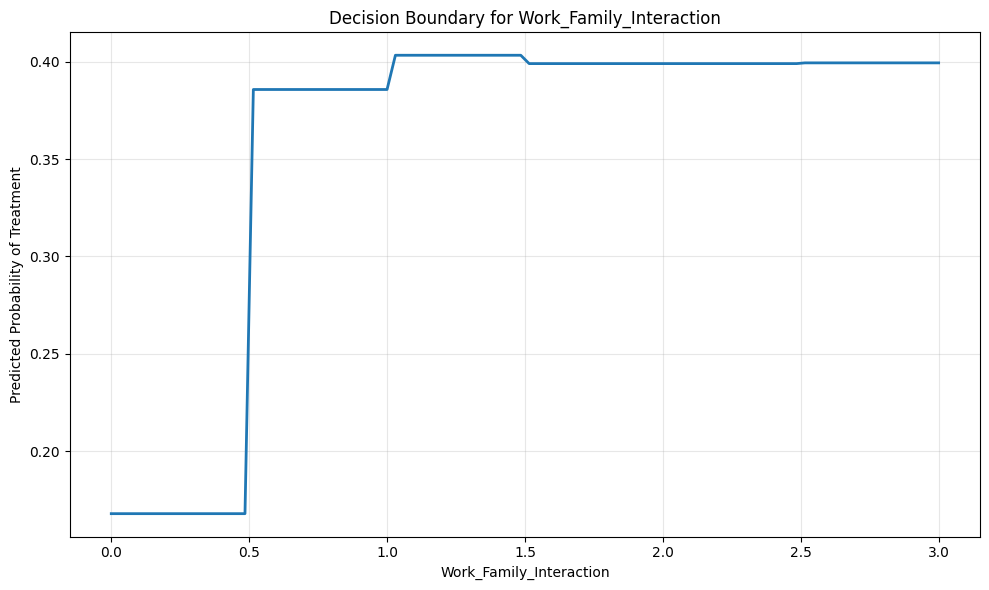

In [149]:
print("\n5. DECISION BOUNDARY ANALYSIS")
print("-" * 40)

top_feature = (feature_importance if best_model_name == 'Random Forest' else perm_importance_df).iloc[0]['Feature']
print(f"Analyzing decision boundary for: {top_feature}")

feature_values = np.linspace(
    X[top_feature].min(), X[top_feature].max(), 100
)

X_boundary = X_test.median().values.reshape(1, -1).repeat(100, axis=0)
feature_idx = X.columns.get_loc(top_feature)
X_boundary[:, feature_idx] = feature_values

if best_model_name in ['Logistic Regression', 'SVM']:
    X_boundary_scaled = scaler.transform(X_boundary)
    predictions = model.predict_proba(X_boundary_scaled)[:, 1]
else:
    predictions = model.predict_proba(X_boundary)[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(feature_values, predictions, linewidth=2)
plt.xlabel(top_feature)
plt.ylabel('Predicted Probability of Treatment')
plt.title(f'Decision Boundary for {top_feature}')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 6: INDIVIDUAL PREDICTION EXPLANATIONS

In [150]:
print("\n6. INDIVIDUAL PREDICTION EXPLANATIONS")
print("-" * 40)

sample_indices = [0, 1, 2, 3, 4]
X_samples = X_test.iloc[sample_indices] if best_model_name == 'Random Forest' else pd.DataFrame(X_test_scaled[sample_indices], columns=X.columns)
y_samples = y_test.iloc[sample_indices]

predictions = model.predict_proba(X_samples if best_model_name == 'Random Forest' else X_samples.values)[:, 1]

print("Sample Predictions Explanation:")
for i, (idx, pred, actual) in enumerate(zip(sample_indices, predictions, y_samples)):
    print(f"\nSample {i+1} (Index {idx}):")
    print(f"  Predicted Probability: {pred:.3f}")
    print(f"  Actual: {actual}")
    print(f"  Prediction: {'Treatment' if pred > 0.5 else 'No Treatment'}")

    if best_model_name == 'Random Forest':
        sample_contribution = feature_importance.copy()
        sample_values = X_samples.iloc[i]
        sample_contribution['Value'] = sample_values[sample_contribution['Feature']].values
        sample_contribution['Contribution'] = (sample_contribution['Importance'] * sample_contribution['Value']).astype(float)

        print("  Top contributing features:")
        top_contrib = sample_contribution.nlargest(5, 'Contribution')
        for _, row in top_contrib.iterrows():
            print(f"    {row['Feature']}: {row['Value']:.3f} (contrib: {row['Contribution']:.3f})")



6. INDIVIDUAL PREDICTION EXPLANATIONS
----------------------------------------
Sample Predictions Explanation:

Sample 1 (Index 0):
  Predicted Probability: 0.278
  Actual: 0
  Prediction: No Treatment
  Top contributing features:
    Poly_Age work_interfere: 32.000 (contrib: 1.415)
    Gender_Male_Age_Interaction: 32.000 (contrib: 0.721)
    Age: 32.000 (contrib: 0.655)
    Poly_Age Workplace_Support_Score: 16.000 (contrib: 0.563)
    PCA_3: 11.238 (contrib: 0.447)

Sample 2 (Index 1):
  Predicted Probability: 0.638
  Actual: 1
  Prediction: Treatment
  Top contributing features:
    Poly_Age work_interfere: 126.000 (contrib: 5.571)
    PCA_2: 76.088 (contrib: 4.296)
    Poly_Age Workplace_Support_Score: 63.000 (contrib: 2.218)
    Gender_Male_Age_Interaction: 42.000 (contrib: 0.947)
    Age: 42.000 (contrib: 0.859)

Sample 3 (Index 2):
  Predicted Probability: 0.770
  Actual: 1
  Prediction: Treatment
  Top contributing features:
    Poly_Age work_interfere: 111.000 (contrib: 4.908)

## 7: FEATURE CORRELATION WITH TARGET


7. FEATURE-TARGET CORRELATION ANALYSIS
----------------------------------------
Top 15 Features by Correlation with Target:
                                        Feature  Correlation
33                      Work_Family_Interaction     0.386543
1                                family_history     0.377918
43  Poly_work_interfere Workplace_Support_Score     0.319274
29                           Risk_Factors_Score     0.316293
39                      Poly_Age work_interfere     0.306777
2                                work_interfere     0.304502
51                                        PCA_2     0.273813
4                                  care_options     0.236578
28                                    High_Risk     0.222542
42             Poly_work_interfere no_employees     0.209798
52                                        PCA_3    -0.194167
50                                        PCA_1     0.193894
48                           Support_Risk_Ratio    -0.184865
15                   

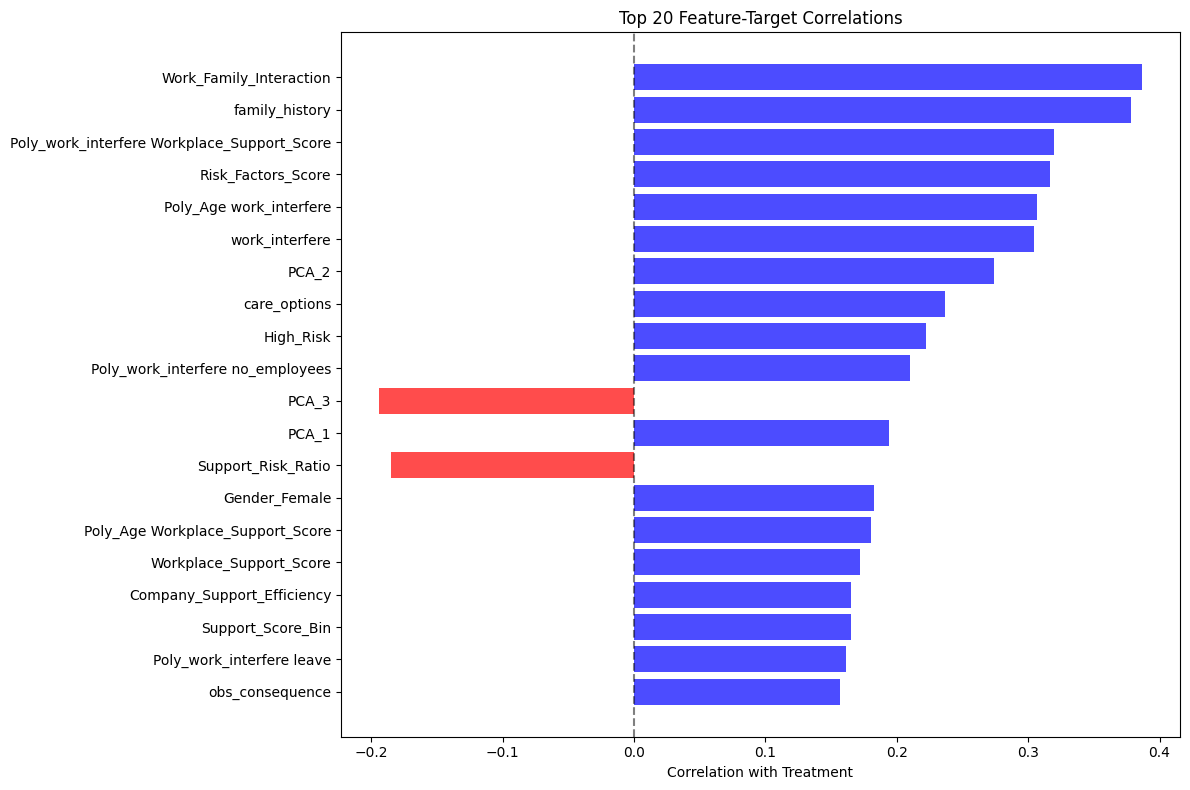

In [151]:
print("\n7. FEATURE-TARGET CORRELATION ANALYSIS")
print("-" * 40)

feature_target_corr = pd.DataFrame({
    'Feature': X.columns,
    'Correlation': [X[col].corr(y) for col in X.columns]
}).sort_values('Correlation', key=abs, ascending=False)

print("Top 15 Features by Correlation with Target:")
print(feature_target_corr.head(15))

plt.figure(figsize=(12, 8))
top_corr_features = feature_target_corr.head(20)
colors = ['red' if corr < 0 else 'blue' for corr in top_corr_features['Correlation']]
plt.barh(range(len(top_corr_features)), top_corr_features['Correlation'], color=colors, alpha=0.7)
plt.yticks(range(len(top_corr_features)), top_corr_features['Feature'])
plt.xlabel('Correlation with Treatment')
plt.title('Top 20 Feature-Target Correlations')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## 8: MODEL CONFIDENCE ANALYSIS


8. MODEL CONFIDENCE ANALYSIS
----------------------------------------
Low confidence predictions: 83 (32.9%)
Medium confidence predictions: 123 (48.8%)
High confidence predictions: 46 (18.3%)


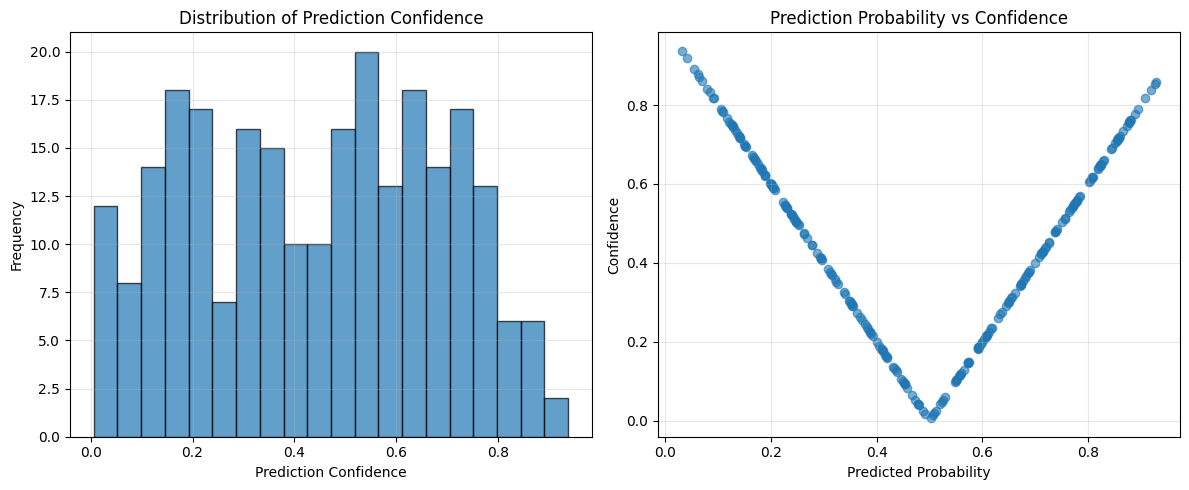

In [152]:
print("\n8. MODEL CONFIDENCE ANALYSIS")
print("-" * 40)

all_predictions = model.predict_proba(X_test if best_model_name == 'Random Forest' else X_test_scaled)[:, 1]
prediction_confidence = np.abs(all_predictions - 0.5) * 2

low_conf_mask = prediction_confidence < 0.3
medium_conf_mask = (prediction_confidence >= 0.3) & (prediction_confidence < 0.7)
high_conf_mask = prediction_confidence >= 0.7

print(f"Low confidence predictions: {low_conf_mask.sum()} ({low_conf_mask.mean()*100:.1f}%)")
print(f"Medium confidence predictions: {medium_conf_mask.sum()} ({medium_conf_mask.mean()*100:.1f}%)")
print(f"High confidence predictions: {high_conf_mask.sum()} ({high_conf_mask.mean()*100:.1f}%)")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(prediction_confidence, bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('Prediction Confidence')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Confidence')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(all_predictions, prediction_confidence, alpha=0.6)
plt.xlabel('Predicted Probability')
plt.ylabel('Confidence')
plt.title('Prediction Probability vs Confidence')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9: SAVEING INTERPRETATION RESULTS

In [153]:
print("\n9. SAVING INTERPRETATION RESULTS")
print("-" * 40)

if best_model_name == 'Random Forest':
    feature_importance.to_csv('feature_importance_interpretation.csv', index=False)
else:
    feature_importance.to_csv('feature_coefficients_interpretation.csv', index=False)

perm_importance_df.to_csv('permutation_importance.csv', index=False)

feature_target_corr.to_csv('feature_target_correlations.csv', index=False)

interpretation_summary = {
    'Best_Model': [best_model_name],
    'Top_Feature': [top_feature],
    'Top_Feature_Importance': [feature_importance.iloc[0]['Importance'] if best_model_name == 'Random Forest' else feature_importance.iloc[0]['Abs_Coefficient']],
    'Low_Confidence_Predictions': [low_conf_mask.sum()],
    'High_Confidence_Predictions': [high_conf_mask.sum()],
    'Average_Prediction_Confidence': [prediction_confidence.mean()]
}

pd.DataFrame(interpretation_summary).to_csv('model_interpretation_summary.csv', index=False)

print("Saved files:")
print("- feature_importance_interpretation.csv / feature_coefficients_interpretation.csv")
print("- permutation_importance.csv")
print("- feature_target_correlations.csv")
print("- model_interpretation_summary.csv")



9. SAVING INTERPRETATION RESULTS
----------------------------------------
Saved files:
- feature_importance_interpretation.csv / feature_coefficients_interpretation.csv
- permutation_importance.csv
- feature_target_correlations.csv
- model_interpretation_summary.csv


## 10: KEY INSIGHTS SUMMARY

In [154]:
print("\n10. KEY INSIGHTS FROM MODEL INTERPRETATION")
print("-" * 40)

print(f"Model Type: {best_model_name}")
print(f"Most Important Feature: {top_feature}")

if best_model_name == 'Random Forest':
    top_importance = feature_importance.iloc[0]['Importance']
    print(f"Top Feature Importance Score: {top_importance:.4f}")
else:
    top_coeff = feature_importance.iloc[0]['Coefficient']
    print(f"Top Feature Coefficient: {top_coeff:.4f}")

top_perm_importance = perm_importance_df.iloc[0]['Importance_Mean']
print(f"Top Permutation Importance: {top_perm_importance:.4f}")

top_correlation = feature_target_corr.iloc[0]['Correlation']
print(f"Strongest Feature-Target Correlation: {top_correlation:.4f}")

print(f"\nPrediction Confidence:")
print(f"  Average confidence: {prediction_confidence.mean():.3f}")
print(f"  High confidence predictions: {high_conf_mask.mean()*100:.1f}%")

print(f"\nTop 5 Most Influential Features:")
for i in range(5):
    if best_model_name == 'Random Forest':
        feat_name = feature_importance.iloc[i]['Feature']
        feat_score = feature_importance.iloc[i]['Importance']
        print(f"  {i+1}. {feat_name}: {feat_score:.4f}")
    else:
        feat_name = feature_importance.iloc[i]['Feature']
        feat_coeff = feature_importance.iloc[i]['Coefficient']
        print(f"  {i+1}. {feat_name}: {feat_coeff:+.4f}")



10. KEY INSIGHTS FROM MODEL INTERPRETATION
----------------------------------------
Model Type: Random Forest
Most Important Feature: Work_Family_Interaction
Top Feature Importance Score: 0.0699
Top Permutation Importance: 0.0117
Strongest Feature-Target Correlation: 0.3865

Prediction Confidence:
  Average confidence: 0.444
  High confidence predictions: 18.3%

Top 5 Most Influential Features:
  1. Work_Family_Interaction: 0.0699
  2. family_history: 0.0576
  3. PCA_2: 0.0565
  4. Poly_Age work_interfere: 0.0442
  5. PCA_3: 0.0397


----
----

# 8: Testing on data with predictive model

PREDICTIVE MODEL TESTING & VALIDATION
Testing Model: Random Forest
Dataset shape: (1259, 56)
Train set: (755, 55)
Validation set: (252, 55)
Test set: (252, 55)
Model trained with parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}

1. BASIC PERFORMANCE EVALUATION
--------------------------------------------------
Validation Set Performance:
  Accuracy: 0.7817
  Precision: 0.7647
  Recall: 0.8189
  F1-Score: 0.7909
  AUC: 0.8277

Test Set Performance:
  Accuracy: 0.7619
  Precision: 0.7833
  Recall: 0.7344
  F1-Score: 0.7581
  AUC: 0.8201

Performance Consistency (Val vs Test):
  Accuracy difference: 0.0198
  AUC difference: 0.0075

2. DETAILED CLASSIFICATION ANALYSIS
--------------------------------------------------
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.77       124
           1       0.78      0.73      0.76

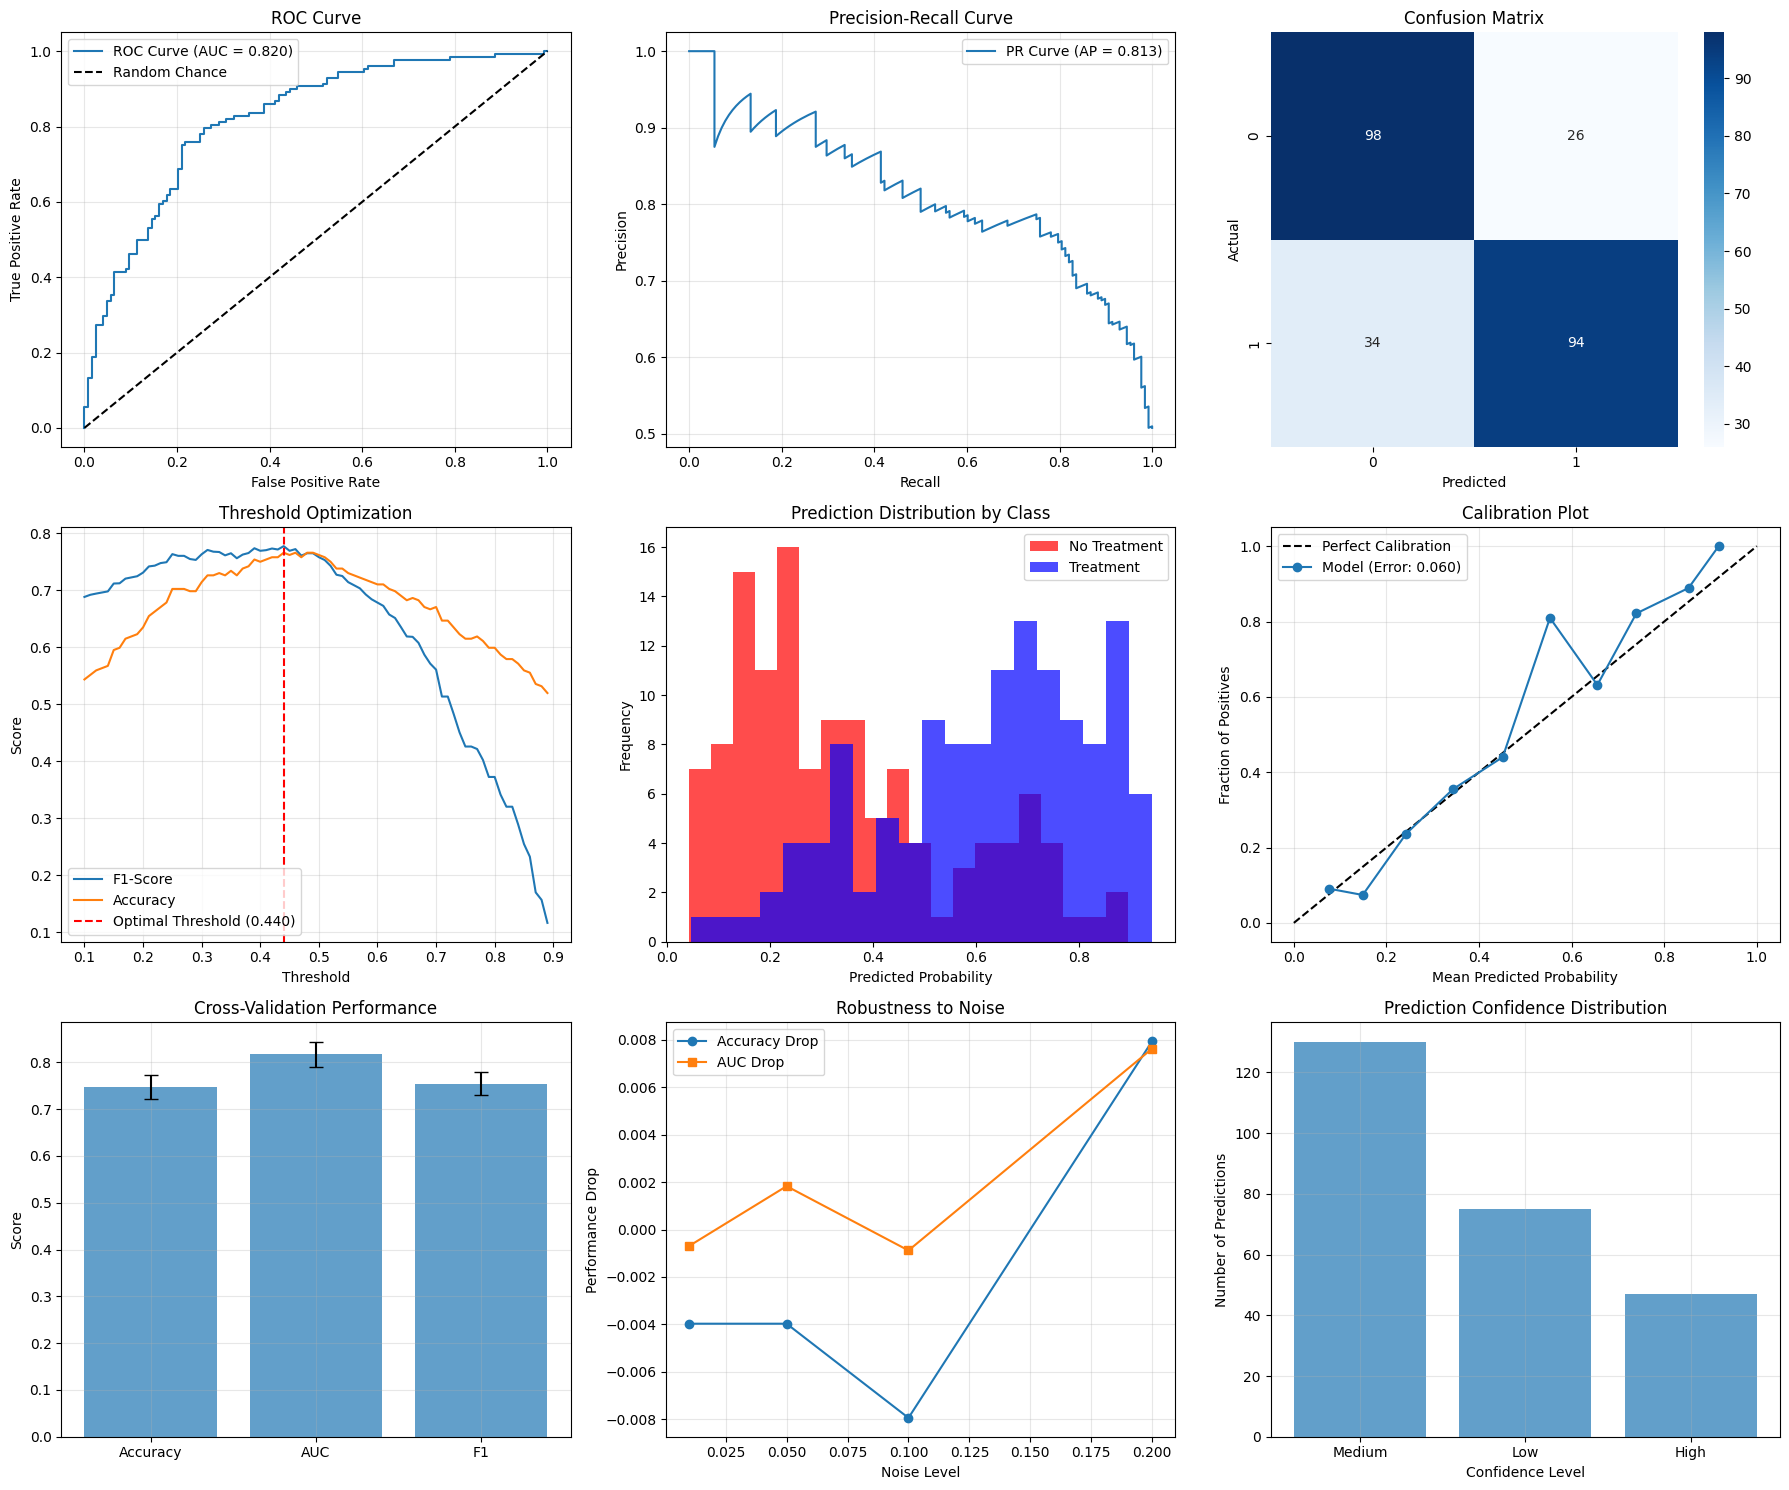


10. SAVING TESTING RESULTS
--------------------------------------------------
Saved files:
- final_model_test_results.csv
- error_analysis_results.csv
- robustness_test_results.csv
- confidence_analysis_results.csv

11. FINAL TESTING SUMMARY
--------------------------------------------------
Model: Random Forest
Test Set Size: 252 samples
Class Distribution: {1: 128, 0: 124}

Final Performance Metrics:
  Accuracy: 0.7619
  Precision: 0.7833
  Recall: 0.7344
  F1-Score: 0.7581
  AUC: 0.8201
  Average Precision: 0.8125

Model Reliability:
  Cross-validation stability: 0.0263 (AUC std)
  Calibration error: 0.0599
  Robustness to noise: 0.0079 (accuracy drop at 20% noise)

Prediction Confidence:
  High confidence predictions: 47 (18.7%)
  Low confidence predictions: 75 (29.8%)

Recommended Threshold: 0.440 (for optimal F1-score)


In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve,
    precision_recall_curve, average_precision_score, log_loss, brier_score_loss
)
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
import warnings
warnings.filterwarnings('ignore')

print("=" * 60)
print("PREDICTIVE MODEL TESTING & VALIDATION")
print("=" * 60)

df = pd.read_csv('survey_features_selected.csv')
final_summary = pd.read_csv('final_tuned_model_summary.csv')
best_params_df = pd.read_csv('best_hyperparameters.csv')

best_model_name = final_summary['Best_Model'].iloc[0]

print(f"Testing Model: {best_model_name}")
print(f"Dataset shape: {df.shape}")

X = df.drop('treatment', axis=1)
y = df['treatment']

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"Train set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

def get_best_params(model_name):
    model_params = best_params_df[best_params_df['Model'] == model_name]
    best_params = {}
    for _, row in model_params.iterrows():
        param_name = row['Parameter']
        param_value = row['Value']

        if param_value == 'None':
            best_params[param_name] = None
        elif param_value == 'True':
            best_params[param_name] = True
        elif param_value == 'False':
            best_params[param_name] = False
        elif param_value.replace('.', '').replace('-', '').isdigit():
            best_params[param_name] = float(param_value) if '.' in param_value else int(param_value)
        else:
            best_params[param_name] = param_value
    return best_params

best_params = get_best_params(best_model_name)

if best_model_name == 'Random Forest':
    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)
    use_scaled = False
elif best_model_name == 'Logistic Regression':
    model = LogisticRegression(**best_params, random_state=42)
    model.fit(X_train_scaled, y_train)
    use_scaled = True
else:
    model = SVC(**best_params, random_state=42, probability=True)
    model.fit(X_train_scaled, y_train)
    use_scaled = True

print(f"Model trained with parameters: {best_params}")

print("\n1. BASIC PERFORMANCE EVALUATION")
print("-" * 50)

X_test_model = X_test_scaled if use_scaled else X_test
X_val_model = X_val_scaled if use_scaled else X_val

val_pred = model.predict(X_val_model)
val_proba = model.predict_proba(X_val_model)[:, 1]
test_pred = model.predict(X_test_model)
test_proba = model.predict_proba(X_test_model)[:, 1]

val_accuracy = accuracy_score(y_val, val_pred)
val_precision = precision_score(y_val, val_pred)
val_recall = recall_score(y_val, val_pred)
val_f1 = f1_score(y_val, val_pred)
val_auc = roc_auc_score(y_val, val_proba)

test_accuracy = accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_auc = roc_auc_score(y_test, test_proba)

print("Validation Set Performance:")
print(f"  Accuracy: {val_accuracy:.4f}")
print(f"  Precision: {val_precision:.4f}")
print(f"  Recall: {val_recall:.4f}")
print(f"  F1-Score: {val_f1:.4f}")
print(f"  AUC: {val_auc:.4f}")

print("\nTest Set Performance:")
print(f"  Accuracy: {test_accuracy:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall: {test_recall:.4f}")
print(f"  F1-Score: {test_f1:.4f}")
print(f"  AUC: {test_auc:.4f}")

print(f"\nPerformance Consistency (Val vs Test):")
print(f"  Accuracy difference: {abs(val_accuracy - test_accuracy):.4f}")
print(f"  AUC difference: {abs(val_auc - test_auc):.4f}")

print("\n2. DETAILED CLASSIFICATION ANALYSIS")
print("-" * 50)

print("Test Set Classification Report:")
print(classification_report(y_test, test_pred))

print("Test Set Confusion Matrix:")
cm = confusion_matrix(y_test, test_pred)
print(cm)

test_avg_precision = average_precision_score(y_test, test_proba)
test_log_loss = log_loss(y_test, test_proba)
test_brier_score = brier_score_loss(y_test, test_proba)

print(f"\nAdditional Metrics:")
print(f"  Average Precision: {test_avg_precision:.4f}")
print(f"  Log Loss: {test_log_loss:.4f}")
print(f"  Brier Score: {test_brier_score:.4f}")

print("\n3. CROSS-VALIDATION TESTING")
print("-" * 50)

cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

X_train_val = np.vstack([X_train_scaled if use_scaled else X_train,
                        X_val_scaled if use_scaled else X_val])
y_train_val = np.hstack([y_train, y_val])

cv_scores_accuracy = cross_val_score(model, X_train_val, y_train_val,
                                   cv=cv_folds, scoring='accuracy')
cv_scores_auc = cross_val_score(model, X_train_val, y_train_val,
                               cv=cv_folds, scoring='roc_auc')
cv_scores_f1 = cross_val_score(model, X_train_val, y_train_val,
                              cv=cv_folds, scoring='f1')

print("5-Fold Cross-Validation Results:")
print(f"  Accuracy: {cv_scores_accuracy.mean():.4f} (+/- {cv_scores_accuracy.std() * 2:.4f})")
print(f"  AUC: {cv_scores_auc.mean():.4f} (+/- {cv_scores_auc.std() * 2:.4f})")
print(f"  F1-Score: {cv_scores_f1.mean():.4f} (+/- {cv_scores_f1.std() * 2:.4f})")

print("\n4. THRESHOLD OPTIMIZATION")
print("-" * 50)

thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = []
accuracies = []

for threshold in thresholds:
    pred_thresh = (test_proba >= threshold).astype(int)
    f1_thresh = f1_score(y_test, pred_thresh)
    acc_thresh = accuracy_score(y_test, pred_thresh)
    f1_scores.append(f1_thresh)
    accuracies.append(acc_thresh)

optimal_threshold_f1 = thresholds[np.argmax(f1_scores)]
optimal_f1 = max(f1_scores)

optimal_threshold_acc = thresholds[np.argmax(accuracies)]
optimal_acc = max(accuracies)

print(f"Optimal Threshold (F1): {optimal_threshold_f1:.3f} (F1: {optimal_f1:.4f})")
print(f"Optimal Threshold (Accuracy): {optimal_threshold_acc:.3f} (Acc: {optimal_acc:.4f})")

test_pred_optimal = (test_proba >= optimal_threshold_f1).astype(int)
test_precision_opt = precision_score(y_test, test_pred_optimal)
test_recall_opt = recall_score(y_test, test_pred_optimal)

print(f"Performance with optimal threshold:")
print(f"  Precision: {test_precision_opt:.4f}")
print(f"  Recall: {test_recall_opt:.4f}")
print(f"  F1-Score: {optimal_f1:.4f}")

print("\n5. ROBUSTNESS TESTING")
print("-" * 50)

print("Testing with noisy features...")
noise_levels = [0.01, 0.05, 0.1, 0.2]
robustness_results = []

for noise_level in noise_levels:
    X_test_noisy = X_test_model + np.random.normal(0, noise_level, X_test_model.shape)

    test_pred_noisy = model.predict(X_test_noisy)
    test_proba_noisy = model.predict_proba(X_test_noisy)[:, 1]

    acc_noisy = accuracy_score(y_test, test_pred_noisy)
    auc_noisy = roc_auc_score(y_test, test_proba_noisy)

    robustness_results.append({
        'noise_level': noise_level,
        'accuracy': acc_noisy,
        'auc': auc_noisy,
        'accuracy_drop': test_accuracy - acc_noisy,
        'auc_drop': test_auc - auc_noisy
    })

    print(f"  Noise level {noise_level}: Acc={acc_noisy:.4f} (drop: {test_accuracy - acc_noisy:.4f}), "
          f"AUC={auc_noisy:.4f} (drop: {test_auc - auc_noisy:.4f})")

print("\n6. PREDICTION CONFIDENCE ANALYSIS")
print("-" * 50)

confidence_scores = np.abs(test_proba - 0.5) * 2
confidence_categories = pd.cut(confidence_scores, bins=[0, 0.3, 0.7, 1.0],
                              labels=['Low', 'Medium', 'High'])

confidence_analysis = pd.DataFrame({
    'confidence_category': confidence_categories,
    'actual': y_test,
    'predicted': test_pred,
    'probability': test_proba
})

print("Confidence Analysis:")
for category in ['Low', 'Medium', 'High']:
    subset = confidence_analysis[confidence_analysis['confidence_category'] == category]
    if len(subset) > 0:
        accuracy_subset = accuracy_score(subset['actual'], subset['predicted'])
        count = len(subset)
        print(f"  {category} Confidence: {count} samples, Accuracy: {accuracy_subset:.4f}")

print("\n7. ERROR ANALYSIS")
print("-" * 50)

fp_mask = (y_test == 0) & (test_pred == 1)
fn_mask = (y_test == 1) & (test_pred == 0)
tp_mask = (y_test == 1) & (test_pred == 1)
tn_mask = (y_test == 0) & (test_pred == 0)

print(f"Error Distribution:")
print(f"  True Positives: {tp_mask.sum()}")
print(f"  True Negatives: {tn_mask.sum()}")
print(f"  False Positives: {fp_mask.sum()}")
print(f"  False Negatives: {fn_mask.sum()}")

if fp_mask.sum() > 0:
    fp_proba_mean = test_proba[fp_mask].mean()
    print(f"  Average probability for False Positives: {fp_proba_mean:.4f}")

if fn_mask.sum() > 0:
    fn_proba_mean = test_proba[fn_mask].mean()
    print(f"  Average probability for False Negatives: {fn_proba_mean:.4f}")

print("\n8. CALIBRATION TESTING")
print("-" * 50)

fraction_of_positives, mean_predicted_value = calibration_curve(
    y_test, test_proba, n_bins=10
)

calibration_error = np.abs(fraction_of_positives - mean_predicted_value).mean()
print(f"Mean Calibration Error: {calibration_error:.4f}")

calibrated_clf = CalibratedClassifierCV(model, method='isotonic', cv=3)
calibrated_clf.fit(X_train_val, y_train_val)

test_proba_calibrated = calibrated_clf.predict_proba(X_test_model)[:, 1]
test_pred_calibrated = calibrated_clf.predict(X_test_model)

cal_accuracy = accuracy_score(y_test, test_pred_calibrated)
cal_auc = roc_auc_score(y_test, test_proba_calibrated)
cal_brier = brier_score_loss(y_test, test_proba_calibrated)

print(f"Calibrated Model Performance:")
print(f"  Accuracy: {cal_accuracy:.4f}")
print(f"  AUC: {cal_auc:.4f}")
print(f"  Brier Score: {cal_brier:.4f}")

print("\n9. CREATING EVALUATION VISUALIZATIONS")
print("-" * 50)

fig, axes = plt.subplots(3, 3, figsize=(18, 15))

fpr, tpr, _ = roc_curve(y_test, test_proba)
axes[0, 0].plot(fpr, tpr, label=f'ROC Curve (AUC = {test_auc:.3f})')
axes[0, 0].plot([0, 1], [0, 1], 'k--', label='Random Chance')
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].set_title('ROC Curve')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

precision_curve, recall_curve, _ = precision_recall_curve(y_test, test_proba)
axes[0, 1].plot(recall_curve, precision_curve,
                label=f'PR Curve (AP = {test_avg_precision:.3f})')
axes[0, 1].set_xlabel('Recall')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_title('Precision-Recall Curve')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 2])
axes[0, 2].set_title('Confusion Matrix')
axes[0, 2].set_xlabel('Predicted')
axes[0, 2].set_ylabel('Actual')

axes[1, 0].plot(thresholds, f1_scores, label='F1-Score')
axes[1, 0].plot(thresholds, accuracies, label='Accuracy')
axes[1, 0].axvline(x=optimal_threshold_f1, color='red', linestyle='--',
                   label=f'Optimal Threshold ({optimal_threshold_f1:.3f})')
axes[1, 0].set_xlabel('Threshold')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_title('Threshold Optimization')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(test_proba[y_test == 0], bins=20, alpha=0.7, label='No Treatment', color='red')
axes[1, 1].hist(test_proba[y_test == 1], bins=20, alpha=0.7, label='Treatment', color='blue')
axes[1, 1].set_xlabel('Predicted Probability')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Prediction Distribution by Class')
axes[1, 1].legend()

axes[1, 2].plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')
axes[1, 2].plot(mean_predicted_value, fraction_of_positives, 'o-',
                label=f'Model (Error: {calibration_error:.3f})')
axes[1, 2].set_xlabel('Mean Predicted Probability')
axes[1, 2].set_ylabel('Fraction of Positives')
axes[1, 2].set_title('Calibration Plot')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

cv_metrics = ['Accuracy', 'AUC', 'F1']
cv_means = [cv_scores_accuracy.mean(), cv_scores_auc.mean(), cv_scores_f1.mean()]
cv_stds = [cv_scores_accuracy.std(), cv_scores_auc.std(), cv_scores_f1.std()]

axes[2, 0].bar(cv_metrics, cv_means, yerr=cv_stds, capsize=5, alpha=0.7)
axes[2, 0].set_ylabel('Score')
axes[2, 0].set_title('Cross-Validation Performance')
axes[2, 0].grid(True, alpha=0.3)

noise_levels_plot = [r['noise_level'] for r in robustness_results]
accuracy_drops = [r['accuracy_drop'] for r in robustness_results]
auc_drops = [r['auc_drop'] for r in robustness_results]

axes[2, 1].plot(noise_levels_plot, accuracy_drops, 'o-', label='Accuracy Drop')
axes[2, 1].plot(noise_levels_plot, auc_drops, 's-', label='AUC Drop')
axes[2, 1].set_xlabel('Noise Level')
axes[2, 1].set_ylabel('Performance Drop')
axes[2, 1].set_title('Robustness to Noise')
axes[2, 1].legend()
axes[2, 1].grid(True, alpha=0.3)

conf_counts = confidence_analysis['confidence_category'].value_counts()
axes[2, 2].bar(conf_counts.index, conf_counts.values, alpha=0.7)
axes[2, 2].set_xlabel('Confidence Level')
axes[2, 2].set_ylabel('Number of Predictions')
axes[2, 2].set_title('Prediction Confidence Distribution')
axes[2, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n10. SAVING TESTING RESULTS")
print("-" * 50)

test_results = {
    'Model': [best_model_name],
    'Test_Accuracy': [test_accuracy],
    'Test_Precision': [test_precision],
    'Test_Recall': [test_recall],
    'Test_F1': [test_f1],
    'Test_AUC': [test_auc],
    'Test_Average_Precision': [test_avg_precision],
    'Test_Log_Loss': [test_log_loss],
    'Test_Brier_Score': [test_brier_score],
    'Optimal_Threshold': [optimal_threshold_f1],
    'CV_Accuracy_Mean': [cv_scores_accuracy.mean()],
    'CV_Accuracy_Std': [cv_scores_accuracy.std()],
    'CV_AUC_Mean': [cv_scores_auc.mean()],
    'CV_AUC_Std': [cv_scores_auc.std()],
    'Calibration_Error': [calibration_error],
    'High_Confidence_Predictions': [(confidence_categories == 'High').sum()],
    'Low_Confidence_Predictions': [(confidence_categories == 'Low').sum()]
}

pd.DataFrame(test_results).to_csv('final_model_test_results.csv', index=False)

error_analysis_results = pd.DataFrame({
    'Error_Type': ['True_Positive', 'True_Negative', 'False_Positive', 'False_Negative'],
    'Count': [tp_mask.sum(), tn_mask.sum(), fp_mask.sum(), fn_mask.sum()],
    'Percentage': [tp_mask.mean()*100, tn_mask.mean()*100, fp_mask.mean()*100, fn_mask.mean()*100]
})

error_analysis_results.to_csv('error_analysis_results.csv', index=False)

pd.DataFrame(robustness_results).to_csv('robustness_test_results.csv', index=False)

confidence_summary = confidence_analysis.groupby('confidence_category').agg({
    'actual': 'count',
    'predicted': lambda x: accuracy_score(confidence_analysis.loc[x.index, 'actual'], x)
}).rename(columns={'actual': 'count', 'predicted': 'accuracy'})

confidence_summary.to_csv('confidence_analysis_results.csv')

print("Saved files:")
print("- final_model_test_results.csv")
print("- error_analysis_results.csv")
print("- robustness_test_results.csv")
print("- confidence_analysis_results.csv")

print("\n11. FINAL TESTING SUMMARY")
print("-" * 50)

print(f"Model: {best_model_name}")
print(f"Test Set Size: {len(y_test)} samples")
print(f"Class Distribution: {y_test.value_counts().to_dict()}")

print(f"\nFinal Performance Metrics:")
print(f"  Accuracy: {test_accuracy:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall: {test_recall:.4f}")
print(f"  F1-Score: {test_f1:.4f}")
print(f"  AUC: {test_auc:.4f}")
print(f"  Average Precision: {test_avg_precision:.4f}")

print(f"\nModel Reliability:")
print(f"  Cross-validation stability: {cv_scores_auc.std():.4f} (AUC std)")
print(f"  Calibration error: {calibration_error:.4f}")
print(f"  Robustness to noise: {accuracy_drops[-1]:.4f} (accuracy drop at 20% noise)")

print(f"\nPrediction Confidence:")
print(f"  High confidence predictions: {(confidence_categories == 'High').sum()} ({(confidence_categories == 'High').mean()*100:.1f}%)")
print(f"  Low confidence predictions: {(confidence_categories == 'Low').sum()} ({(confidence_categories == 'Low').mean()*100:.1f}%)")

print(f"\nRecommended Threshold: {optimal_threshold_f1:.3f} (for optimal F1-score)")